In [92]:
# Import necesscary packages.
import os

import earthpy as et
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
import geopandas as gpd
import folium
import seaborn as sns
from scipy.stats import linregress
from datetime import datetime, timedelta
from matplotlib.lines import Line2D
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import linregress
from folium.plugins import HeatMap
from sklearn.preprocessing import MinMaxScaler
from folium import Marker
from sklearn.linear_model import LinearRegression

In [2]:
# Set working directory.
temp_path = os.path.join(
    et.io.HOME,
    'earth-analytics',
    'data')
# Check if the path exists, if not create it.
if os.path.exists(temp_path):
    os.chdir(temp_path)
else:
    print('This path does not exist')
os.getcwd()

'/Users/rebeccamchugh/earth-analytics/data'

In [61]:
# Import csv files for temperature data.
temp_dir = glob(os.path.join('temperature-data-july-2023', '*'))
temp_dir

['temperature-data-july-2023/#006 2023-07-27 09_02_21 MDT (Data MDT).csv',
 'temperature-data-july-2023/#044A_Jul_27_2023_09_25_00.csv',
 'temperature-data-july-2023/#012 2023-07-27 15_59_03 MDT (Data MDT).csv',
 'temperature-data-july-2023/#007 2023-07-27 08_57_01 MDT (Data MDT).csv',
 'temperature-data-july-2023/#004 2023-07-26 16_45_41 MDT (Data MDT).csv',
 'temperature-data-july-2023/#001 2023-07-26 16_03_44 MDT (Data MDT).csv',
 'temperature-data-july-2023/#009 2023-07-26 11_40_53 MDT (Data MDT).csv',
 'temperature-data-july-2023/#027 2023-07-27 15_04_27 MDT (Data MDT).csv',
 'temperature-data-july-2023/#014 2023-07-27 14_56_57 MDT (Data MDT).csv',
 'temperature-data-july-2023/#022 2023-07-27 10_30_57 MDT (Data MDT).csv',
 'temperature-data-july-2023/#042 2023-07-19 13_42_35 MDT (Data MDT).csv',
 'temperature-data-july-2023/#008 2023-07-26 10_12_54 MDT (Data MDT).csv',
 'temperature-data-july-2023/#003 2023-07-26 16_37_06 MDT (Data MDT).csv',
 'temperature-data-july-2023/#010 2023

In [43]:
# Import one csv file.
def import_temp_csv(file_name):
    """
    Download an air temperature csv file.

    Function will allow a different csv file to be downloaded and edited to 
    required specifications.

    Paramterers.
    ----------
    file_name : str
      The name of the file.

    Returns
    --------
    Imported csv. 
        The requested and edited csv file.
    """
                                                                                                        
    # Read csv and make the date time column the index.
    downloaded_temp_csv = pd.read_csv(file_name,
                                      index_col='Date-Time (MDT)',
                                      parse_dates=True)
    return downloaded_temp_csv


sensor_001 = import_temp_csv(
    'temperature-data-july-2023/#001 2023-07-26 16_03_44 MDT (Data MDT).csv')
sensor_002 = import_temp_csv(
    'temperature-data-july-2023/#002 2023-07-26 16_20_51 MDT (Data MDT).csv')
sensor_003 = import_temp_csv(
    'temperature-data-july-2023/#003 2023-07-26 16_37_06 MDT (Data MDT).csv')
sensor_004 = import_temp_csv(
    'temperature-data-july-2023/#004 2023-07-26 16_45_41 MDT (Data MDT).csv')
sensor_005 = import_temp_csv(
    'temperature-data-july-2023/#005 2023-07-27 09_10_26 MDT (Data MDT).csv')
sensor_006 = import_temp_csv(
    'temperature-data-july-2023/#006 2023-07-27 09_02_21 MDT (Data MDT).csv')
sensor_007 = import_temp_csv(
    'temperature-data-july-2023/#007 2023-07-27 08_57_01 MDT (Data MDT).csv')
sensor_008 = import_temp_csv(
    'temperature-data-july-2023/#008 2023-07-26 10_12_54 MDT (Data MDT).csv')
sensor_009 = import_temp_csv(
    'temperature-data-july-2023/#009 2023-07-26 11_40_53 MDT (Data MDT).csv')
sensor_010 = import_temp_csv(
    'temperature-data-july-2023/#010 2023-07-27 16_31_28 MDT (Data MDT).csv')
sensor_011 = import_temp_csv(
     'temperature-data-july-2023/#011 2023-07-27 16_10_01 MDT (Data MDT).csv')
sensor_012 = import_temp_csv(
     'temperature-data-july-2023/#012 2023-07-27 15_59_03 MDT (Data MDT).csv')
sensor_013 = import_temp_csv(
    'temperature-data-july-2023/#013 2023-07-27 15_46_42 MDT (Data MDT).csv')
sensor_014 = import_temp_csv(
    'temperature-data-july-2023/#014 2023-07-27 14_56_57 MDT (Data MDT).csv')
sensor_015 = import_temp_csv(
     'temperature-data-july-2023/#015 2023-07-27 14_47_01 MDT (Data MDT).csv')
sensor_016 = import_temp_csv( 
     'temperature-data-july-2023/#016 2023-07-27 11_07_55 MDT (Data MDT).csv')
sensor_017 = import_temp_csv( 
    'temperature-data-july-2023/#017 2023-07-27 16_18_24 MDT (Data MDT).csv')
sensor_018 = import_temp_csv(
    'temperature-data-july-2023/#018 2023-07-27 13_31_24 MDT (Data MDT).csv')
sensor_019 = import_temp_csv(
    'temperature-data-july-2023/#019 2023-07-20 09_56_28 MDT (Data MDT).csv')
sensor_020 = import_temp_csv(
     'temperature-data-july-2023/#020 2023-07-27 11_26_09 MDT (Data MDT).csv')
sensor_021 = import_temp_csv(
    'temperature-data-july-2023/#021 2023-07-27 10_51_59 MDT (Data MDT).csv')
sensor_022 = import_temp_csv(
    'temperature-data-july-2023/#022 2023-07-27 10_30_57 MDT (Data MDT).csv')
sensor_023 = import_temp_csv(
    'temperature-data-july-2023/#023 2023-07-27 10_12_17 MDT (Data MDT).csv')
sensor_024 = import_temp_csv(
     'temperature-data-july-2023/#024 2023-07-27 09_59_43 MDT (Data MDT).csv')
sensor_025 = import_temp_csv(
    'temperature-data-july-2023/#025 2023-07-27 09_53_14 MDT (Data MDT).csv')
sensor_026 = import_temp_csv(
    'temperature-data-july-2023/#026 2023-07-19 12_37_31 MDT (Data MDT).csv')
sensor_027 = import_temp_csv(
    'temperature-data-july-2023/#027 2023-07-27 15_04_27 MDT (Data MDT).csv')
sensor_028 = import_temp_csv(
    'temperature-data-july-2023/#028 2023-07-27 15_24_45 MDT (Data MDT).csv')
sensor_029 = import_temp_csv(
    'temperature-data-july-2023/#029 2023-07-27 15_12_52 MDT (Data MDT).csv')
sensor_030a = import_temp_csv(
     'temperature-data-july-2023/#030 2023-07-06 16_04_11 MDT (Data MDT).csv')
sensor_030b = import_temp_csv(
    'temperature-data-july-2023/#030 replacement  2023-07-27 16_39_11 MDT (Data MDT).csv')
sensor_031 = import_temp_csv(
    'temperature-data-july-2023/#031 2023-07-26 14_58_30 MDT (Data MDT).csv')
sensor_035 = import_temp_csv(
    'temperature-data-july-2023/#035 2023-07-26 15_52_04 MDT (Data MDT).csv')
sensor_036 = import_temp_csv(
    'temperature-data-july-2023/#036 2023-07-26 15_20_32 MDT (Data MDT).csv')
sensor_037 = import_temp_csv(
    'temperature-data-july-2023/#037 2023-07-20 08_31_09 MDT (Data MDT).csv')
sensor_038 = import_temp_csv (
    'temperature-data-july-2023/#038 2023-07-19 10_30_13 MDT (Data MDT).csv')
sensor_039 =  import_temp_csv(
    'temperature-data-july-2023/#039 replacement  2023-07-27 15_37_41 MDT (Data MDT).csv')
sensor_040 = import_temp_csv(
    'temperature-data-july-2023/#040 2023-07-26 14_45_51 MDT (Data MDT).csv')
#sensor_041 = import_temp_csv()
sensor_042 = import_temp_csv(
    'temperature-data-july-2023/#042 2023-07-19 13_42_35 MDT (Data MDT).csv')
sensor_043 = import_temp_csv(
    'temperature-data-july-2023/#043 2023-07-19 09_54_19 MDT (Data MDT).csv')

In [44]:
def edit_imported_temp_csv(df):
    """Edit sensor data to the correct parameters."""
    # Remove the first, third, and fourth columns
    df = df.drop(columns=[df.columns[0], df.columns[2], df.columns[3]])

    # Rename the index column to 'date_time'
    df.index.name = 'date_time'

    # Rename the first column to 'temp_fahrenheit'
    df = df.rename(columns={df.columns[0]: 'temp_fahrenheit'})

    return df



sensor_001 = edit_imported_temp_csv(sensor_001)
sensor_002 = edit_imported_temp_csv(sensor_002)
sensor_003 = edit_imported_temp_csv(sensor_003)
sensor_004 = edit_imported_temp_csv(sensor_004)
sensor_005 = edit_imported_temp_csv(sensor_005)
sensor_006 = edit_imported_temp_csv(sensor_006)
sensor_007 = edit_imported_temp_csv(sensor_007)
sensor_008 = edit_imported_temp_csv(sensor_008)
sensor_009 = edit_imported_temp_csv(sensor_009)
sensor_010 = edit_imported_temp_csv(sensor_010)
sensor_011 = edit_imported_temp_csv(sensor_011)
sensor_012 = edit_imported_temp_csv(sensor_012)
sensor_013 = edit_imported_temp_csv(sensor_013)
sensor_014 = edit_imported_temp_csv(sensor_014)
sensor_015 = edit_imported_temp_csv(sensor_015)
sensor_016 = edit_imported_temp_csv(sensor_016)
sensor_017 = edit_imported_temp_csv(sensor_017)
sensor_018 = edit_imported_temp_csv(sensor_018)
sensor_019 = edit_imported_temp_csv(sensor_019)
sensor_020 = edit_imported_temp_csv(sensor_020)
sensor_021 = edit_imported_temp_csv(sensor_021)
sensor_022 = edit_imported_temp_csv(sensor_022)
sensor_023 = edit_imported_temp_csv(sensor_023)
sensor_024 = edit_imported_temp_csv(sensor_024)
sensor_025 = edit_imported_temp_csv(sensor_025)
sensor_026 = edit_imported_temp_csv(sensor_026)
sensor_027 = edit_imported_temp_csv(sensor_027)
sensor_028 = edit_imported_temp_csv(sensor_028)
sensor_029 = edit_imported_temp_csv(sensor_029)
sensor_030a = edit_imported_temp_csv(sensor_030a)
sensor_030b = edit_imported_temp_csv(sensor_030b)
sensor_031 = edit_imported_temp_csv(sensor_031)
#sensor_032 = edit_imported_temp_csv(sensor_032)
#sensor_033 = edit_imported_temp_csv(sensor_033)
#sensor_034 = edit_imported_temp_csv(sensor_034)
sensor_035 = edit_imported_temp_csv(sensor_035)
sensor_036 = edit_imported_temp_csv(sensor_036)
sensor_037 = edit_imported_temp_csv(sensor_037)
sensor_038 = edit_imported_temp_csv(sensor_038)
sensor_039 = edit_imported_temp_csv(sensor_039)
sensor_040 = edit_imported_temp_csv(sensor_040)
#sensor_041 = edit_imported_temp_csv(sensor_041)
sensor_042 = edit_imported_temp_csv(sensor_042)
sensor_043 = edit_imported_temp_csv(sensor_043)

In [48]:
# Sensor 030 needs to be edited and combined. 
start_date_a = pd.to_datetime('2023-05-18')
end_date_a = pd.to_datetime('2023-07-08')

sensor_030a_period = sensor_030a[(sensor_030a.index >= start_date_a) & (sensor_030a.index <= end_date_a)]

start_date_b = pd.to_datetime('2023-07-08')

sensor_030b_period = sensor_030b[sensor_030b.index >= start_date_b]

sensor_030 = pd.concat([sensor_030a_period, sensor_030b_period])
sensor_030

,temp_fahrenheit
date_time,
2023-05-18 00:00:00,57.01
2023-05-18 00:05:00,56.55
2023-05-18 00:10:00,56.32
2023-05-18 00:15:00,56.01
2023-05-18 00:20:00,55.78
...,...
2023-07-27 16:19:00,93.08
2023-07-27 16:24:00,94.62
2023-07-27 16:29:00,95.32


In [6]:
# Function to edit kestrel sensors
def import_edit_irrigation(file_path):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Select the desired columns and rename them
    df = df.iloc[:, :3]  # Keep the first 3 columns
    df.columns = ['date_time', 'temp_f', 'humidity']  # Rename the columns

    # Drop any rows with missing values in 'date_time' and 'temp_f' columns
    df.dropna(subset=['date_time', 'temp_f'], inplace=True)

    # Convert 'date_time' column to datetime format
    df['date_time'] = pd.to_datetime(df['date_time'])

    return df

In [7]:
# Assign labels and edit the csv files 
sensor_044a = import_edit_irrigation('temperature-data-july-2023/#044A_Jul_27_2023_09_25_00.csv')
sensor_044b = import_edit_irrigation('temperature-data-july-2023/#044B_Jul_27_2023_09_35_00.csv')
sensor_044c = import_edit_irrigation('temperature-data-july-2023/#044C_Jul_27_2023_09_15_00.csv')
sensor_045a = import_edit_irrigation('temperature-data-july-2023/#045A_Jul_27_2023_14_10_00.csv')
sensor_045b = import_edit_irrigation('temperature-data-july-2023/#045B_Jul_27_2023_14_25_00.csv')
sensor_045c = import_edit_irrigation('temperature-data-july-2023/#045C_Jul_27_2023_14_35_00.csv')
sensor_046a = import_edit_irrigation('temperature-data-july-2023/#046A_Jul_27_2023_17_00_00.csv')
#sensor_046b = import_edit_irrigation('temperature-data-2023/#046B_Jul_7_2023_11_02_28.csv')
sensor_047a = import_edit_irrigation('temperature-data-july-2023/#047A_Jul_27_2023_13_55_00.csv')
sensor_047b = import_edit_irrigation('temperature-data-july-2023/#047B_Jul_27_2023_13_45_00.csv')
sensor_048a = import_edit_irrigation('temperature-data-july-2023/#048A_Jul_27_2023_11_25_00.csv')
sensor_048b = import_edit_irrigation('temperature-data-july-2023/#048B_Jul_27_2023_11_35_00.csv')
sensor_049a = import_edit_irrigation('temperature-data-july-2023/#049A_Jul_26_2023_11_10_00.csv')
#sensor_049b = 

In [8]:
# Create a function for files so that each is by day and night 5 am to 10 pm for HOBO sensors
def day_night_temps(df, sensor_number):
    df.index = pd.to_datetime(df.index)
    df['Time of Day'] = 'Day'
    df.loc[(df.index.hour >= 22) | (df.index.hour <= 5), 'Time of Day'] = 'Night'
    df['sensor_number'] = sensor_number
    return df

In [9]:
# Add function to all files (adding new column with sensor number and day/night)
day_night_temps(sensor_001, 'sensor_001')
day_night_temps(sensor_002, 'sensor_002')
day_night_temps(sensor_003, 'sensor_003')
day_night_temps(sensor_004, 'sensor_004')
day_night_temps(sensor_005, 'sensor_005')
day_night_temps(sensor_006, 'sensor_006')
day_night_temps(sensor_007, 'sensor_007')
day_night_temps(sensor_009, 'sensor_009')
day_night_temps(sensor_010, 'sensor_010')
day_night_temps(sensor_011, 'sensor_011')
day_night_temps(sensor_012, 'sensor_012')
day_night_temps(sensor_013, 'sensor_013')
day_night_temps(sensor_014, 'sensor_014')
day_night_temps(sensor_015, 'sensor_015')
day_night_temps(sensor_016, 'sensor_016')
day_night_temps(sensor_017, 'sensor_017')
day_night_temps(sensor_018, 'sensor_018')
day_night_temps(sensor_019, 'sensor_019')
day_night_temps(sensor_020, 'sensor_020')
day_night_temps(sensor_021, 'sensor_021')
day_night_temps(sensor_022, 'sensor_022')
day_night_temps(sensor_023, 'sensor_023')
day_night_temps(sensor_024, 'sensor_024')
day_night_temps(sensor_025, 'sensor_025')
day_night_temps(sensor_026, 'sensor_026')
day_night_temps(sensor_027, 'sensor_027')
day_night_temps(sensor_028, 'sensor_028')
day_night_temps(sensor_029, 'sensor_029')
day_night_temps(sensor_030, 'sensor_030')
day_night_temps(sensor_031, 'sensor_031')
#day_night_temps(sensor_032, 'sensor_032')
#day_night_temps(sensor_033, 'sensor_033')
#day_night_temps(sensor_034, 'sensor_034')
day_night_temps(sensor_035, 'sensor_035')
day_night_temps(sensor_036, 'sensor_036')
day_night_temps(sensor_037, 'sensor_037')
day_night_temps(sensor_038, 'sensor_038')
day_night_temps(sensor_039, 'sensor_039')
day_night_temps(sensor_040, 'sensor_040')
#day_night_temps(sensor_041, 'sensor_041')
day_night_temps(sensor_042, 'sensor_042')
day_night_temps(sensor_043, 'sensor_043')

,temp_fahrenheit,Time of Day,sensor_number
date_time,,,
2023-05-17 00:00:00,64.58,Night,sensor_043
2023-05-17 00:05:00,64.35,Night,sensor_043
2023-05-17 00:10:00,64.20,Night,sensor_043
2023-05-17 00:15:00,63.89,Night,sensor_043
2023-05-17 00:20:00,63.73,Night,sensor_043
...,...,...,...
2023-07-19 09:35:00,78.87,Day,sensor_043
2023-07-19 09:40:00,78.87,Day,sensor_043
2023-07-19 09:45:00,78.87,Day,sensor_043


In [10]:
# Add day/night for kestrel sensors. 
def add_time_of_day_and_sensor_number(df, sensor_number):
    df['date_time'] = pd.to_datetime(df['date_time'])
    df['Time of Day'] = 'Day'
    df.loc[(df['date_time'].dt.hour >= 22) | (df['date_time'].dt.hour <= 5), 'Time of Day'] = 'Night'
    df['sensor_number'] = sensor_number
    return df


In [11]:
# Edit day/night and sensor number for kestrel sensors
sensor_044a = add_time_of_day_and_sensor_number(sensor_044a, 'sensor_044a')
sensor_044b = add_time_of_day_and_sensor_number(sensor_044b, 'sensor_044b')
sensor_044c = add_time_of_day_and_sensor_number(sensor_044c, 'sensor_044c')
sensor_045a = add_time_of_day_and_sensor_number(sensor_045a, 'sensor_045a')
sensor_045b = add_time_of_day_and_sensor_number(sensor_045b, 'sensor_045b')
sensor_045c = add_time_of_day_and_sensor_number(sensor_045c, 'sensor_045c')
sensor_046a = add_time_of_day_and_sensor_number(sensor_046a, 'sensor_046a')
#sensor_046b = add_time_of_day_and_sensor_number
sensor_047a = add_time_of_day_and_sensor_number(sensor_047a, 'sensor_047a')
sensor_047b = add_time_of_day_and_sensor_number(sensor_047b, 'sensor_047b')
sensor_048a = add_time_of_day_and_sensor_number(sensor_048a, 'sensor_048a')
sensor_048b = add_time_of_day_and_sensor_number(sensor_048b, 'sensor_048b')
sensor_049a = add_time_of_day_and_sensor_number(sensor_049a, 'sensor_049b')
#sensor_049b = add_time_of_day_and_sensor_number

In [12]:
# Edit start dates for kestrel sensors
def filter_data_for_sensor(df, sensor_number, start_date):
    df['date_time'] = pd.to_datetime(df['date_time'])
    filtered_df = df[(df['date_time'] >= start_date) & (df['sensor_number'] == sensor_number)]
    return filtered_df


In [29]:
# Filter kestrel sensor dates
sensor_044a = filter_data_for_sensor(sensor_044a, 'sensor_044a', '2023-07-01 00:00:00')
sensor_044b = filter_data_for_sensor(sensor_044b, 'sensor_044b', '2023-07-01 00:00:00')
sensor_044c = filter_data_for_sensor(sensor_044c, 'sensor_044c', '2023-07-15 00:00:00')
sensor_045a = filter_data_for_sensor(sensor_045a, 'sensor_045a', '2023-07-01 00:00:00')
sensor_045b = filter_data_for_sensor(sensor_045b, 'sensor_045b', '2023-07-01 00:00:00')
sensor_045c = filter_data_for_sensor(sensor_045c, 'sensor_045c', '2023-07-15 00:00:00')
sensor_046a = filter_data_for_sensor(sensor_046a, 'sensor_046a', '2023-07-01 00:00:00')
#sensor_046b = add_time_of_day_and_sensor_number
sensor_047a = filter_data_for_sensor(sensor_047a, 'sensor_047a', '2023-07-07 00:00:00')
sensor_047b = filter_data_for_sensor(sensor_047b, 'sensor_047b', '2023-07-07 00:00:00')
sensor_048a = filter_data_for_sensor(sensor_048a, 'sensor_048a', '2023-07-21 00:00:00')
sensor_048b = filter_data_for_sensor(sensor_048b, 'sensor_048b', '2023-07-21 00:00:00')
sensor_049a = filter_data_for_sensor(sensor_049a, 'sensor_049a', '2023-07-26 00:00:00')
#sensor_049b = add_time_of_day_and_sensor_number

In [30]:
def test_start_dates_for_sensor(df, sensor_number):
    # Filter the data for the specific sensor number
    sensor_data = df[df['sensor_number'] == sensor_number]

    # Find the earliest date for the sensor
    start_date = sensor_data.index.min()

    print(f"Start date for {sensor_number}: {start_date}")

# Test for a specific sensor, e.g., 'sensor_034'
test_start_dates_for_sensor(sensor_044a, 'sensor_044a')


Start date for sensor_044a: 7831


In [36]:
# Combine all of the files that have been sorted into night and day into one and concat. 
nightday_list = (sensor_001,
sensor_002,
sensor_003,
sensor_004,
sensor_005,
sensor_006,
sensor_007,
sensor_008,
sensor_009,
sensor_010,
sensor_011,
sensor_012,
sensor_013,
sensor_014,
sensor_015,
sensor_016,
sensor_017,
sensor_018,
sensor_019,
sensor_020,
sensor_021,
sensor_022,
sensor_023,
sensor_024,
sensor_025,
sensor_026,
sensor_027,
sensor_028,
sensor_029,
sensor_030,
sensor_031,
#sensor_032,
#sensor_033,
#sensor_034,
sensor_035,
sensor_036,
sensor_037,
sensor_038,
sensor_039,
sensor_040,
#sensor_041,
sensor_042,
sensor_043)
nightday_df= pd.concat(nightday_list)
nightday_df

,temp_fahrenheit,Time of Day,sensor_number
date_time,,,
2023-05-18 00:00:00,56.86,Night,sensor_001
2023-05-18 00:05:00,56.94,Night,sensor_001
2023-05-18 00:10:00,56.94,Night,sensor_001
2023-05-18 00:15:00,56.86,Night,sensor_001
2023-05-18 00:20:00,56.24,Night,sensor_001
...,...,...,...
2023-07-27 09:40:00,78.17,Day,sensor_024
2023-07-27 09:45:00,78.56,Day,sensor_024
2023-07-27 09:50:00,79.02,Day,sensor_024


In [37]:
# Add start dates for HOBO sensors 

def filter_data_for_sensor_index_as_datetime(df, sensor_number, start_date):
    # Filter by sensor number and date range
    filtered_df = df.loc[(df.index >= start_date) & (df['sensor_number'] == sensor_number)]
    return filtered_df

In [38]:
# Filter sensors for start dates 
sensor_024 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_024', '2023-06-22 00:00:00')
sensor_026 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_024', '2023-05-25 00:00:00')
sensor_037 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_024', '2023-05-25 00:00:00')
sensor_038 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_024', '2023-05-20 00:00:00')
sensor_042 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_024', '2023-05-20 00:00:00')
sensor_043 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_024', '2023-05-19 00:00:00')
                                                    
# Change start dates for other sensors
sensor_001 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_001', '2023-05-18 00:00:00')
sensor_002 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_002', '2023-05-18 00:00:00')
sensor_003 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_003', '2023-05-18 00:00:00')
sensor_004 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_004', '2023-05-18 00:00:00')
sensor_005 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_005', '2023-05-18 00:00:00')
sensor_006 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_006', '2023-05-18 00:00:00')
sensor_007 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_007', '2023-05-18 00:00:00')
sensor_008 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_008', '2023-05-18 00:00:00')
sensor_009 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_009', '2023-05-18 00:00:00')
sensor_010 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_010', '2023-05-18 00:00:00')
sensor_011 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_011', '2023-05-18 00:00:00')
sensor_012 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_012', '2023-05-18 00:00:00')
sensor_013 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_013', '2023-05-18 00:00:00')
sensor_014 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_014', '2023-05-18 00:00:00')
sensor_015 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_015', '2023-05-18 00:00:00')
sensor_016 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_016', '2023-05-18 00:00:00')
sensor_017 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_017', '2023-05-18 00:00:00')
sensor_018 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_018', '2023-05-18 00:00:00')
sensor_019 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_019', '2023-05-18 00:00:00')
sensor_020 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_020', '2023-05-18 00:00:00')
sensor_021 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_021', '2023-05-18 00:00:00')
sensor_022 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_022', '2023-05-18 00:00:00')
sensor_023 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_023', '2023-05-18 00:00:00')
sensor_025 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_025', '2023-05-18 00:00:00')
sensor_027 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_027', '2023-05-18 00:00:00')
sensor_028 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_028', '2023-05-18 00:00:00')
sensor_029 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_029', '2023-05-18 00:00:00')
sensor_030 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_030', '2023-05-18 00:00:00')                                                      
sensor_031 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_031', '2023-05-18 00:00:00')
#sensor_032 = edit_imported_temp_csv(sensor_032)
#sensor_033 = edit_imported_temp_csv(sensor_033)
#sensor_034 = edit_imported_temp_csv(sensor_034)
sensor_035 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_035', '2023-05-18 00:00:00')
sensor_036 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_036', '2023-05-18 00:00:00')
sensor_039 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_039', '2023-05-18 00:00:00')
sensor_040 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_040', '2023-05-18 00:00:00')
#sensor_041 = edit_imported_temp_csv(sensor_041)
sensor_042 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_042', '2023-05-20 00:00:00')
sensor_043 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_043', '2023-05-19 00:00:00')

In [49]:
# Edit Harlow park sensor because it was in the water (sensor 30)
start_date = '2023-06-06'
end_date = '2023-07-08'
sensor_to_exclude = 'sensor_030'

# Filter the DataFrame based on the condition
nightday_df = nightday_df[~((nightday_df['sensor_number'] == sensor_to_exclude) & (nightday_df.index >= start_date) & (nightday_df.index <= end_date))]

print("DataFrame after removing dates for", sensor_to_exclude, "within the specified date range:")
print(nightday_df)



DataFrame after removing dates for sensor_030 within the specified date range:
                     temp_fahrenheit Time of Day sensor_number
date_time                                                     
2023-05-18 00:00:00            56.86       Night    sensor_001
2023-05-18 00:05:00            56.94       Night    sensor_001
2023-05-18 00:10:00            56.94       Night    sensor_001
2023-05-18 00:15:00            56.86       Night    sensor_001
2023-05-18 00:20:00            56.24       Night    sensor_001
...                              ...         ...           ...
2023-07-27 09:40:00            78.17         Day    sensor_024
2023-07-27 09:45:00            78.56         Day    sensor_024
2023-07-27 09:50:00            79.02         Day    sensor_024
2023-07-27 09:55:00            79.72         Day    sensor_024
2023-07-27 09:58:20              NaN         Day    sensor_024

[719049 rows x 3 columns]


In [51]:
# Get monthly max

nightday_agg = nightday_df.groupby(['Time of Day', 'sensor_number', pd.Grouper(freq='M')])['temp_fahrenheit'].agg(
    monthly_max='max', # Calculate the max temperature and name the new column 'monthly_max'
    temp_fahrenheit='first' # Keep the first (original) value of temp_fahrenheit in the new column
).reset_index()

# Print the resulting dataframe
nightday_agg

,Time of Day,sensor_number,date_time,monthly_max,temp_fahrenheit
0,Day,sensor_001,2023-05-31,80.88,50.06
1,Day,sensor_001,2023-06-30,94.08,53.93
2,Day,sensor_001,2023-07-31,96.63,58.71
3,Day,sensor_002,2023-05-31,79.95,49.37
4,Day,sensor_002,2023-06-30,92.00,53.69
...,...,...,...,...,...
185,Night,sensor_036,2023-07-31,76.32,55.55
186,Night,sensor_039,2023-07-31,77.71,76.94
187,Night,sensor_040,2023-05-31,61.72,56.01
188,Night,sensor_040,2023-06-30,72.77,54.70


In [118]:
# Getting average min temp

# Calculate the minimum temperature for each month for each sensor
monthly_min_temps = nightday_df.resample('M')['temp_fahrenheit'].min()

# Convert the monthly_min_temps Series to a DataFrame
monthly_min_temps_df = monthly_min_temps.reset_index()
monthly_min_temps_df.columns = ['date', 'min_temperature']

# Extract month and sensor number from the 'date' column
monthly_min_temps_df['month'] = monthly_min_temps_df['date'].dt.strftime('%Y-%m')
monthly_min_temps_df['sensor_number'] = nightday_df['sensor_number'].iloc[0]  # Replace with your column name

# Calculate the average of monthly minimum temperatures for each sensor
average_min_temp_per_month_per_sensor = monthly_min_temps_df.groupby(['month', 'sensor_number'])['min_temperature'].mean()

print("Average of Monthly Minimum Temperatures for Each Sensor:")
print(average_min_temp_per_month_per_sensor)




Average of Monthly Minimum Temperatures for Each Sensor:
month    sensor_number
2023-05  sensor_001       44.35
2023-06  sensor_001       39.64
2023-07  sensor_001       47.21
Name: min_temperature, dtype: float64


In [24]:
# Define the sensor_mapping dictionary with additional values
sensor_mapping = {
    'sensor_001': ('0.363728', '30.47213', '22.0', '25', 'Hobo', '2022-05-27'),
    'sensor_002': ('0.439855', '25.91392', '22.0', '60', 'Hobo', '2022-05-27'),
    'sensor_003': ('0.11662', '13.43474', '21.0', '0', 'Hobo', '2022-05-27'),
    'sensor_004': ('0.508461', '46.65613', '22.0', '40', 'Hobo', '2022-05-27'),
    'sensor_005': ('0.05995', '0.014293', '71.0', '0', 'Hobo', '2022-05-27'),
    'sensor_006': ('0.511842', '1.829587', '21.0', '0', 'Hobo', '2022-05-27'),
    'sensor_007': ('0.383916', '24.93221', '22.0', '0', 'Hobo', '2022-05-27'),
    'sensor_008': ('0.567748', '27.95649', '22.0', '20', 'Hobo', '2022-05-27'),
    'sensor_009': ('0.000617', '34.08161', '21.0', '97', 'Hobo', '2022-05-27'),
    'sensor_010': ('0.605514', '17.04978', '22.0', '40', 'Hobo', '2022-05-27'),
    'sensor_011': ('0.042766', '31.94138', '21.0', '90', 'Hobo', '2022-05-27'),
    'sensor_012': ('0.757661', '21.82697', '23.0', '85', 'Hobo', '2022-05-27'),
    'sensor_013': ('0.291928', '31.11972', '21.0', '10', 'Hobo', '2022-05-27'),
    'sensor_014': ('0.809408', '3.237618', '23.0', '40', 'Hobo', '2022-05-27'),
    'sensor_015': ('0.841339', '17.11473', '23.0', '80', 'Hobo', '2022-05-27'),
    'sensor_016': ('0.647314', '3.271501', '23.0', '0', 'Hobo', '2022-06-03'),
    'sensor_017': ('0.634154', '18.2559', '22.0', '25', 'Hobo', '2022-05-27'),
    'sensor_018': ('0.124444', '17.03382', '21.0', '90', 'Hobo', '2022-05-27'),
    'sensor_019': ('0', '66.60774', '71.0', '95', 'Hobo', '2022-05-27'),
    'sensor_020': ('0.586828', '2.115719', '22.0', '20', 'Hobo', '2022-05-27'),
    'sensor_021': ('0', '4.175624', '71.0', '0', 'Hobo', '2022-05-27'),
    'sensor_022': ('0', '0.010112', '71.0', '0', 'Hobo', '2022-05-27'),
    'sensor_023': ('0', '5.127098', '71.0', '40', 'Hobo', '2022-05-27'),
    'sensor_024': ('0.466056', '17.9913', '23.0', '10', 'Hobo', '2022-05-27'),
    'sensor_025': ('0.771531', '6.008971', '22.0', '50', 'Hobo', '2022-05-27'),
    'sensor_026': ('0', '2.7959', '21.0', 'NA', 'Hobo', '2022-05-27'),
    'sensor_027': ('0.771806', '13.79064', '23.0', '60', 'Hobo', '2022-06-03'),
    'sensor_028': ('0.029553', '48.08899', '21.0', '20', 'Hobo', '2022-06-17'),
    'sensor_029': ('0.971162', '0.515856', '23.0', '75', 'Acurite', '2022-06-17'),
    'sensor_030': ('0.031343', '29.19479', '11.0', '40', 'Acurite', '2022-06-17'),
    'sensor_031': ('0.371363', '42.60595', '22.0', '98', 'Acurite', '2022-06-17'),
    'sensor_032': ('0', '48', '42.0', 'NA', 'Acurite', '2022-06-15'),
    'sensor_033': ('0', '27', '42.0', 'NA', 'Acurite', '2022-06-15'),
    'sensor_034': ('0', '28', '42.0', 'NA', 'Acurite', '2022-06-15'),
    'sensor_035': ('0.094898', '80.67614', '21.0', '80', 'Acurite', '2022-06-17'),
    'sensor_036': ('0.16951', '21', '22.0', '25', 'Acurite', '2022-06-17'),
    'sensor_037': ('0', '10', '52.0', 'NA', 'Acurite', '2022-06-16'),
    'sensor_038': ('0.337788', '42', '21.0', 'NA', 'Acurite', '2022-06-16'),
    'sensor_039': ('0.052344', '48.90122', '22.0', '30', 'Acurite', '2022-06-17'),
    'sensor_040': ('0.514811', '27.33316', '22.0', '30', 'Acurite', '2022-06-17'),
    'sensor_041': ('0', '37', '90.0', 'NA', 'Acurite', '2022-06-25'),
    'sensor_042': ('0.267038', '30', '90.0', 'NA', 'Acurite', '2022-06-26'),
    'sensor_043': ('0.526808', '33.27364', '22.0', 'NA', 'Acurite', '2022-06-26'),
}

# Iterate over sensor_mapping and add the values to nightday_agg DataFrame
for sensor_number, (ic_value, cc_value, lulc_value, cc_densi_value, shield_type, day_after_install_date) in sensor_mapping.items():
    if cc_densi_value == 'NA':
        cc_densi_value = np.nan
    nightday_agg.loc[nightday_agg['sensor_number'] == sensor_number, 'ic_per_30'] = float(ic_value)
    nightday_agg.loc[nightday_agg['sensor_number'] == sensor_number, 'cc_per_30'] = float(cc_value)
    nightday_agg.loc[nightday_agg['sensor_number'] == sensor_number, 'LULC'] = float(lulc_value)
    nightday_agg.loc[nightday_agg['sensor_number'] == sensor_number, 'cc_per_densi'] = float(cc_densi_value)
    nightday_agg.loc[nightday_agg['sensor_number'] == sensor_number, 'shield_type'] = shield_type
    nightday_agg.loc[nightday_agg['sensor_number'] == sensor_number, 'day_after_install_date'] = pd.to_datetime(day_after_install_date)

# Convert the necessary columns to their appropriate data types
nightday_agg['cc_per_30'] = nightday_agg['cc_per_30'].astype(float)
nightday_agg['ic_per_30'] = nightday_agg['ic_per_30'].astype(float)
nightday_agg['LULC'] = nightday_agg['LULC'].astype(float)
nightday_agg['cc_per_densi'] = nightday_agg['cc_per_densi'].astype(float)
nightday_agg['shield_type'] = nightday_agg['shield_type'].astype(object)
nightday_agg['day_after_install_date'] = nightday_agg['day_after_install_date'].astype('datetime64')

# Print the updated nightday_agg DataFrame
nightday_agg


,Time of Day,sensor_number,date_time,monthly_max,temp_fahrenheit,ic_per_30,cc_per_30,LULC,cc_per_densi,shield_type,day_after_install_date
0,Day,sensor_001,2023-05-31,80.88,55.01,0.363728,30.47213,22.0,25.0,Hobo,2022-05-27
1,Day,sensor_001,2023-06-30,94.08,53.93,0.363728,30.47213,22.0,25.0,Hobo,2022-05-27
2,Day,sensor_001,2023-07-31,96.63,58.71,0.363728,30.47213,22.0,25.0,Hobo,2022-05-27
3,Day,sensor_002,2023-05-31,79.95,56.32,0.439855,25.91392,22.0,60.0,Hobo,2022-05-27
4,Day,sensor_002,2023-06-30,92.00,53.69,0.439855,25.91392,22.0,60.0,Hobo,2022-05-27
...,...,...,...,...,...,...,...,...,...,...,...
215,Night,sensor_042,2023-06-30,78.02,59.02,0.267038,30.00000,90.0,NaN,Acurite,2022-06-26
216,Night,sensor_042,2023-07-31,83.96,57.71,0.267038,30.00000,90.0,NaN,Acurite,2022-06-26
217,Night,sensor_043,2023-05-31,76.40,64.58,0.526808,33.27364,22.0,NaN,Acurite,2022-06-26
218,Night,sensor_043,2023-06-30,76.55,58.79,0.526808,33.27364,22.0,NaN,Acurite,2022-06-26


In [25]:
# Get the daily max and average

# Get the daily max temperature for each day
daily_max_temps = nightday_df.groupby(['Time of Day', 'sensor_number', nightday_df.index.date])['temp_fahrenheit'].max()

# Convert the index to DatetimeIndex
nightday_df.index = pd.to_datetime(nightday_df.index)

# Create a new column with just the month
nightday_df['month'] = nightday_df.index.month

# Group the data by month, Time of Day, and sensor number
grouped = nightday_df.groupby(['month', 'Time of Day', 'sensor_number'])

# Calculate the average of daily max temperatures for each month
monthly_avg_max_temps = grouped['temp_fahrenheit'].mean()

# Convert the result to a DataFrame
monthly_avg_max_temps = monthly_avg_max_temps.reset_index()


In [53]:
# Iterate over sensor_mapping and add the values to nightday_agg DataFrame
for sensor_number, (ic_value, cc_value, lulc_value, cc_densi_value, shield_type, day_after_install_date) in sensor_mapping.items():
    if cc_densi_value == 'NA':
        cc_densi_value = np.nan
    monthly_avg_max_temps.loc[monthly_avg_max_temps['sensor_number'] == sensor_number, 'ic_per_30'] = float(ic_value)
    monthly_avg_max_temps.loc[monthly_avg_max_temps['sensor_number'] == sensor_number, 'cc_per_30'] = float(cc_value)
    monthly_avg_max_temps.loc[monthly_avg_max_temps['sensor_number'] == sensor_number, 'LULC'] = float(lulc_value)
    monthly_avg_max_temps.loc[monthly_avg_max_temps['sensor_number'] == sensor_number, 'cc_per_densi'] = float(cc_densi_value)
    monthly_avg_max_temps.loc[monthly_avg_max_temps['sensor_number'] == sensor_number, 'shield_type'] = shield_type
    monthly_avg_max_temps.loc[monthly_avg_max_temps['sensor_number'] == sensor_number, 'day_after_install_date'] = pd.to_datetime(day_after_install_date)

# Convert the necessary columns to their appropriate data types
monthly_avg_max_temps['cc_per_30'] = monthly_avg_max_temps['cc_per_30'].astype(float)
monthly_avg_max_temps['ic_per_30'] = monthly_avg_max_temps['ic_per_30'].astype(float)
monthly_avg_max_temps['LULC'] = monthly_avg_max_temps['LULC'].astype(float)
monthly_avg_max_temps['cc_per_densi'] = monthly_avg_max_temps['cc_per_densi'].astype(float)
monthly_avg_max_temps['shield_type'] = monthly_avg_max_temps['shield_type'].astype(object)
monthly_avg_max_temps['day_after_install_date'] = monthly_avg_max_temps['day_after_install_date'].astype('datetime64')

# Print the updated nightday_agg DataFrame
monthly_avg_max_temps

,month,Time of Day,sensor_number,temp_fahrenheit,ic_per_30,cc_per_30,LULC,cc_per_densi,shield_type,day_after_install_date
0,5,Day,sensor_001,65.060851,0.363728,30.472130,22.0,25.0,Hobo,2022-05-27
1,5,Day,sensor_002,64.694000,0.439855,25.913920,22.0,60.0,Hobo,2022-05-27
2,5,Day,sensor_003,65.299170,0.116620,13.434740,21.0,0.0,Hobo,2022-05-27
3,5,Day,sensor_004,65.188170,0.508461,46.656130,22.0,40.0,Hobo,2022-05-27
4,5,Day,sensor_005,63.711844,0.059950,0.014293,71.0,0.0,Hobo,2022-05-27
...,...,...,...,...,...,...,...,...,...,...
215,7,Night,sensor_038,64.441494,0.337788,42.000000,21.0,NaN,Acurite,2022-06-16
216,7,Night,sensor_039,67.119821,0.052344,48.901220,22.0,30.0,Acurite,2022-06-17
217,7,Night,sensor_040,65.707783,0.514811,27.333160,22.0,30.0,Acurite,2022-06-17
218,7,Night,sensor_042,65.937572,0.267038,30.000000,90.0,NaN,Acurite,2022-06-26


In [59]:
# Save each plot for each month with the legend (using impervious cover instead of canopy cover)
for i, month in enumerate(months):
    # Get the data for the current month
    month_data = monthly_avg_max_temps[monthly_avg_max_temps['month'] == month]

    # Create the plot as before, but replace 'cc_per_30' with 'ic_per_30' and 'Canopy Cover' with 'Impervious Cover'
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.scatterplot(data=month_data, x='ic_per_30', y='temp_fahrenheit', hue='sensor_number',
                    ax=ax, palette='tab20', alpha=0.7, markers='o')
    sns.regplot(data=month_data[month_data['Time of Day'] == 'Day'], x='ic_per_30', y='temp_fahrenheit', 
                color='black', scatter=False, ax=ax, line_kws={'linestyle':'dashed'})
    sns.regplot(data=month_data[month_data['Time of Day'] == 'Night'], x='ic_per_30', y='temp_fahrenheit', 
                color='black', scatter=False, ax=ax, line_kws={'linestyle':'dotted'})
    
    # Label the sensor_number on the plot
    for _, day_row, night_row in zip(month_data.index, 
                                     month_data[month_data['Time of Day'] == 'Day'].iterrows(), 
                                     month_data[month_data['Time of Day'] == 'Night'].iterrows()):
        ax.text(day_row[1]['ic_per_30'], day_row[1]['temp_fahrenheit'], str(day_row[1]['sensor_number']), 
                fontsize=8, ha='left', va='bottom')
        ax.text(night_row[1]['ic_per_30'], night_row[1]['temp_fahrenheit'], str(night_row[1]['sensor_number']), 
                fontsize=8, ha='left', va='bottom')

    # Calculate regression coefficients and R-squared values for day and night data
    day_coefficients = np.polyfit(month_data[month_data['Time of Day'] == 'Day']['ic_per_30'], 
                                  month_data[month_data['Time of Day'] == 'Day']['temp_fahrenheit'], 1)
    night_coefficients = np.polyfit(month_data[month_data['Time of Day'] == 'Night']['ic_per_30'], 
                                    month_data[month_data['Time of Day'] == 'Night']['temp_fahrenheit'], 1)
    day_r2 = np.corrcoef(month_data[month_data['Time of Day'] == 'Day']['ic_per_30'], 
                         month_data[month_data['Time of Day'] == 'Day']['temp_fahrenheit'])[0, 1] ** 2
    night_r2 = np.corrcoef(month_data[month_data['Time of Day'] == 'Night']['ic_per_30'], 
                           month_data[month_data['Time of Day'] == 'Night']['temp_fahrenheit'])[0, 1] ** 2

    # Create custom legend for regression equations and R-squared values
    legend_text = f"Day Regression: y = {day_coefficients[0]:.2f}x + {day_coefficients[1]:.2f}, R2 = {day_r2:.2f}\n" \
                  f"Night Regression: y = {night_coefficients[0]:.2f}x + {night_coefficients[1]:.2f}, R2 = {night_r2:.2f}"
    ax.legend([legend_text], loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=8)

    # Set the title and labels for each subplot
    ax.set_title(f"Month {month}")
    ax.set_xlabel('Impervious Cover per 30 meters (%)')
    ax.set_ylabel('Temperature (F)')

    # Save the plot with the legend
    plt.tight_layout()
    plt.savefig(f'monthly_mean_max_ic_plot_month_{month}.pdf')
    plt.close()


NameError: name 'months' is not defined

In [55]:
# Save each plot for each month with the legend
for i, month in enumerate(months):
    # Get the data for the current month
    month_data = monthly_avg_max_temps[monthly_avg_max_temps['month'] == month]

    # Create the plot as before
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.scatterplot(data=month_data, x='cc_per_30', y='temp_fahrenheit', hue='sensor_number',
                    ax=ax, palette='tab20', alpha=0.7, markers='o')
    sns.regplot(data=month_data[month_data['Time of Day'] == 'Day'], x='cc_per_30', y='temp_fahrenheit', 
                color='black', scatter=False, ax=ax, line_kws={'linestyle':'dashed'})
    sns.regplot(data=month_data[month_data['Time of Day'] == 'Night'], x='cc_per_30', y='temp_fahrenheit', 
                color='black', scatter=False, ax=ax, line_kws={'linestyle':'dotted'})
    
    # Label the sensor_number on the plot
    for _, day_row, night_row in zip(month_data.index, 
                                     month_data[month_data['Time of Day'] == 'Day'].iterrows(), 
                                     month_data[month_data['Time of Day'] == 'Night'].iterrows()):
        ax.text(day_row[1]['cc_per_30'], day_row[1]['temp_fahrenheit'], str(day_row[1]['sensor_number']), 
                fontsize=8, ha='left', va='bottom')
        ax.text(night_row[1]['cc_per_30'], night_row[1]['temp_fahrenheit'], str(night_row[1]['sensor_number']), 
                fontsize=8, ha='left', va='bottom')

    # Calculate regression coefficients and R-squared values for day and night data
    day_coefficients = np.polyfit(month_data[month_data['Time of Day'] == 'Day']['cc_per_30'], 
                                  month_data[month_data['Time of Day'] == 'Day']['temp_fahrenheit'], 1)
    night_coefficients = np.polyfit(month_data[month_data['Time of Day'] == 'Night']['ic_per_30'], 
                                    month_data[month_data['Time of Day'] == 'Night']['temp_fahrenheit'], 1)
    day_r2 = np.corrcoef(month_data[month_data['Time of Day'] == 'Day']['cc_per_30'], 
                         month_data[month_data['Time of Day'] == 'Day']['temp_fahrenheit'])[0, 1] ** 2
    night_r2 = np.corrcoef(month_data[month_data['Time of Day'] == 'Night']['cc_per_30'], 
                           month_data[month_data['Time of Day'] == 'Night']['temp_fahrenheit'])[0, 1] ** 2

    # Create custom legend for regression equations and R-squared values
    legend_text = f"Day Regression: y = {day_coefficients[0]:.2f}x + {day_coefficients[1]:.2f}, R2 = {day_r2:.2f}\n" \
                  f"Night Regression: y = {night_coefficients[0]:.2f}x + {night_coefficients[1]:.2f}, R2 = {night_r2:.2f}"
    ax.legend([legend_text], loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=8)

    # Set the title and labels for each subplot
    ax.set_title(f"Month {month}")
    ax.set_xlabel('Canopy Cover per 30 meters (%)')
    ax.set_ylabel('Temperature (F)')

    # Save the plot with the legend
    plt.tight_layout()
    plt.savefig(f'monthly_mean_max_cc_plot_month_{month}.pdf')
    plt.close()


NameError: name 'months' is not defined

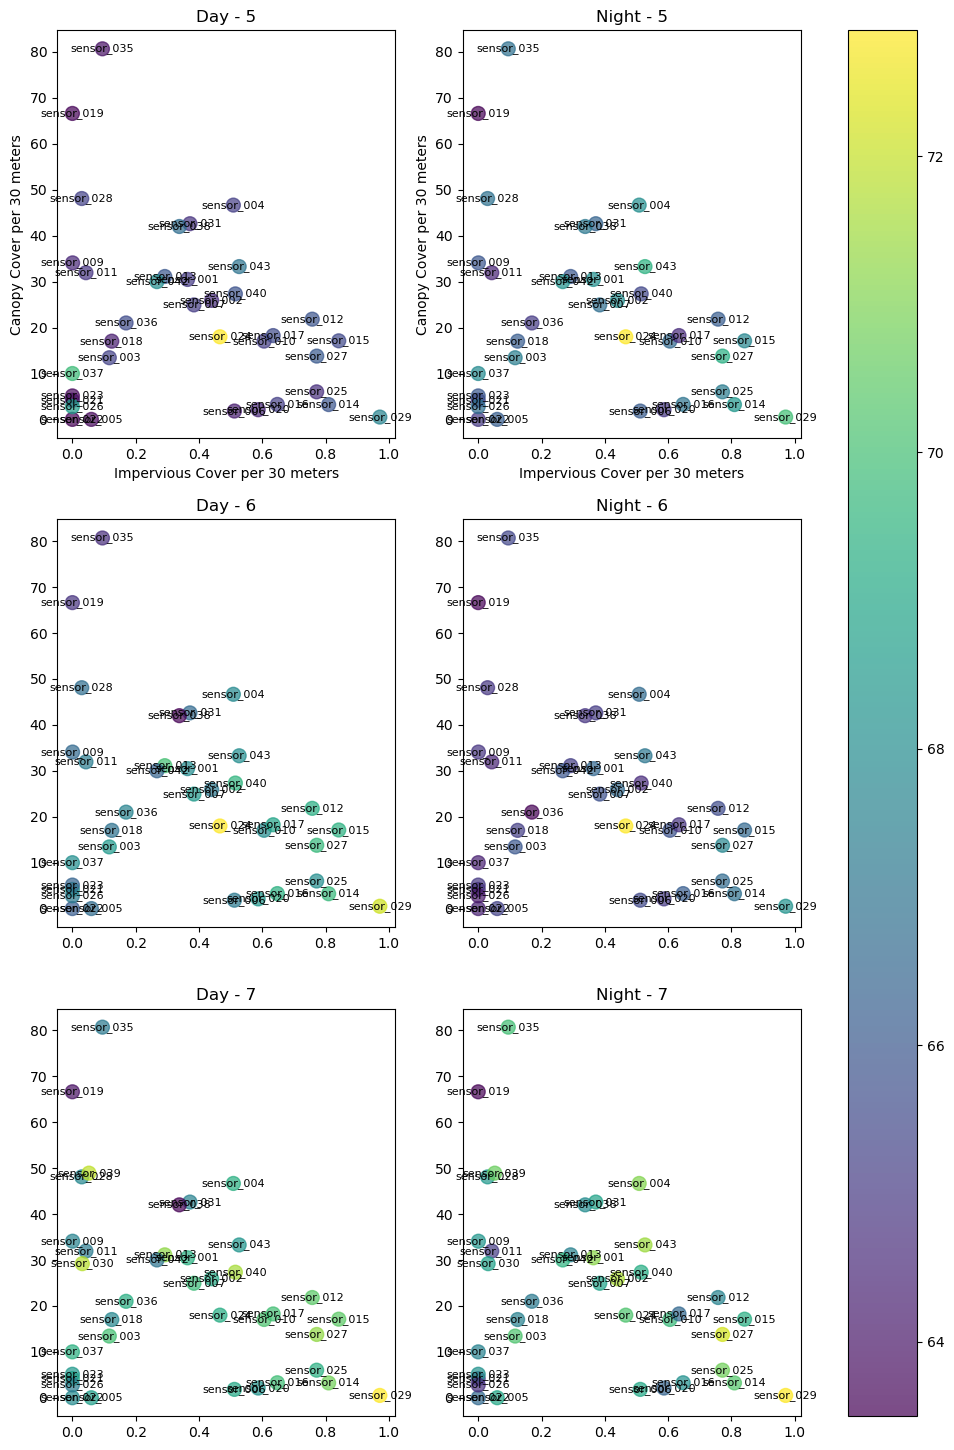

In [60]:
import matplotlib.pyplot as plt

def plot_monthly_temperature_scatter(df, irrigated_sensor, unirrigated_sensor):
    # Filter data for the specific irrigated and unirrigated sensors
    irrigated_data = df[df['sensor_number'] == irrigated_sensor]
    unirrigated_data = df[df['sensor_number'] == unirrigated_sensor]
    
    # Get unique months
    months = df['month'].unique()
    
    # Calculate the number of rows and columns for subplots
    num_rows = len(months)
    num_cols = 2  # Two subplots: one for Day data and one for Night data
    
    # Create separate subplots for each month
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 6 * num_rows))
    
    for i, month in enumerate(months):
        month_data = df[df['month'] == month]
        
        # Plot for Day data
        day_data = month_data[month_data['Time of Day'] == 'Day']
        axes[i, 0].scatter(day_data['ic_per_30'], day_data['cc_per_30'], c=day_data['temp_fahrenheit'],
                           cmap='viridis', s=100, alpha=0.7, label='Time of Day: Day')
        axes[i, 0].set_title(f'Day - {month}')
        
        # Add sensor_number labels to the scatter plot for Day data
        for index, row in day_data.iterrows():
            axes[i, 0].text(row['ic_per_30'], row['cc_per_30'], row['sensor_number'], fontsize=8, ha='center', va='center')
        
        # Plot for Night data
        night_data = month_data[month_data['Time of Day'] == 'Night']
        axes[i, 1].scatter(night_data['ic_per_30'], night_data['cc_per_30'], c=night_data['temp_fahrenheit'],
                           cmap='viridis', s=100, alpha=0.7, label='Time of Day: Night')
        axes[i, 1].set_title(f'Night - {month}')
        
        # Add sensor_number labels to the scatter plot for Night data
        for index, row in night_data.iterrows():
            axes[i, 1].text(row['ic_per_30'], row['cc_per_30'], row['sensor_number'], fontsize=8, ha='center', va='center')
    
    # Add labels, legend, and other plot elements
    axes[0, 0].set_xlabel('Impervious Cover per 30 meters')
    axes[0, 1].set_xlabel('Impervious Cover per 30 meters')
    axes[0, 0].set_ylabel('Canopy Cover per 30 meters')
    axes[0, 1].set_ylabel('Canopy Cover per 30 meters')
    fig.colorbar(axes[0, 0].collections[0], ax=axes[:, :])
    plt.savefig("temp_gradient")
    plt.show()

# Call the function with the given DataFrame and sensor numbers
irrigated_sensor_number = 'sensor_001'
unirrigated_sensor_number = 'sensor_002'
plot_monthly_temperature_scatter(monthly_avg_max_temps, irrigated_sensor_number, unirrigated_sensor_number)


In [ ]:
# Irrigation plots 
# Filter the data for the desired date range (July 1 to July 7, 2023)
start_date = pd.to_datetime('2023-07-15')
end_date = pd.to_datetime('2023-07-25')
sensor_047a = sensor_047a[(sensor_047a['date_time'] >= start_date) & (sensor_047a['date_time'] < end_date)]
sensor_047b = sensor_047b[(sensor_047b['date_time'] >= start_date) & (sensor_047b['date_time'] < end_date)]

# Calculate the daily mean and max for each sensor
sensor_047a_mean = sensor_047a.resample('D', on='date_time').mean()
sensor_047b_mean = sensor_047b.resample('D', on='date_time').mean()
sensor_047a_max = sensor_047a.resample('D', on='date_time').max()
sensor_047b_max = sensor_047b.resample('D', on='date_time').max()

# Plot the data
plt.figure(figsize=(12, 6))

# Mean Temperature and Humidity
plt.subplot(1, 2, 1)
sns.lineplot(data=sensor_047a_mean, x='date_time', y='temp_f', label='Sensor 047 irrigated (Mean Temp)', color='blue')
sns.lineplot(data=sensor_047a_mean, x='date_time', y='humidity', label='Sensor 047 irrigated (Mean Humidity)', color='green')
sns.lineplot(data=sensor_047b_mean, x='date_time', y='temp_f', label='Sensor 047 un-irrigated (Mean Temp)', color='orange')
sns.lineplot(data=sensor_047b_mean, x='date_time', y='humidity', label='Sensor 047 un-irrigated (Mean Humidity)', color='red')
plt.xlabel('Date')
plt.ylabel('Temperature (F) and Humidity (%)')
plt.title('Mean Temperature and Humidity')
plt.legend()

# Max Temperature and Humidity
plt.subplot(1, 2, 2)
sns.lineplot(data=sensor_047a_max, x='date_time', y='temp_f', label='Sensor 047 irrigated (Max Temp)', color='blue')
sns.lineplot(data=sensor_047a_max, x='date_time', y='humidity', label='Sensor 047 irrigated (Max Humidity)', color='green')
sns.lineplot(data=sensor_047b_max, x='date_time', y='temp_f', label='Sensor 047 un-irrigated (Max Temp)', color='orange')
sns.lineplot(data=sensor_047b_max, x='date_time', y='humidity', label='Sensor 047 un-irrigated (Max Humidity)', color='red')
plt.xlabel('Date')
plt.ylabel('Temperature (F) and Humidity (%)')
plt.title('Max Temperature and Humidity')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Filter sensor_044a for data from July 1, 2023, to July 7, 2023
sensor_045a_period = sensor_045a[
    (sensor_045a['date_time'] >= '2023-07-15') & (sensor_045a['date_time'] <= '2023-07-25')
]

# Filter sensor_044b for data from July 1, 2023, to July 7, 2023
sensor_045c_period = sensor_045c[
    (sensor_045c['date_time'] >= '2023-07-15') & (sensor_045c['date_time'] <= '2023-07-25')
]

# Calculate the daily max for both dataframes
sensor_045a_daily_max = sensor_045a_period.resample('D', on='date_time').max()
sensor_045c_daily_max = sensor_045c_period.resample('D', on='date_time').max()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(sensor_045a_daily_max.index, sensor_045a_daily_max['temp_f'], label='Temperature (°F) - sensor_047 irrigated')
plt.plot(sensor_045a_daily_max.index, sensor_045a_daily_max['humidity'], label='Humidity - sensor_047 irrigated')
plt.plot(sensor_045c_daily_max.index, sensor_045c_daily_max['temp_f'], label='Temperature (°F) - sensor_047 un-irrigated')
plt.plot(sensor_045c_daily_max.index, sensor_045c_daily_max['humidity'], label='Humidity - sensor_047 un-irrigated')
plt.xlabel('Date')
plt.ylabel('Daily Max Temperature (°F) / Daily Max Humidity')
plt.title('Daily Max Temperature and Humidity from July 15 to July 25, 2023')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Ensure that the 'date_time' column is in datetime format
sensor_045a['date_time'] = pd.to_datetime(sensor_045a['date_time'])
sensor_045c['date_time'] = pd.to_datetime(sensor_045c['date_time'])

# Filter sensor_045a for data from July 15, 2023, to July 25, 2023 (AM data)
start_date_am = pd.to_datetime('2023-07-15 00:00:00')
end_date_am = pd.to_datetime('2023-07-25 12:00:00')
sensor_045a_period_am = sensor_045a[sensor_045a['date_time'].between(start_date_am, end_date_am)]

# Filter sensor_045a for data from July 15, 2023, to July 25, 2023 (PM data)
start_date_pm = pd.to_datetime('2023-07-15 12:00:00')
end_date_pm = pd.to_datetime('2023-07-25 23:59:59')
sensor_045a_period_pm = sensor_045a[sensor_045a['date_time'].between(start_date_pm, end_date_pm)]

# Filter sensor_045c for data from July 15, 2023, to July 25, 2023 (AM data)
sensor_045c_period_am = sensor_045c[sensor_045c['date_time'].between(start_date_am, end_date_am)]

# Filter sensor_045c for data from July 15, 2023, to July 25, 2023 (PM data)
sensor_045c_period_pm = sensor_045c[sensor_045c['date_time'].between(start_date_pm, end_date_pm)]

# Calculate the daily max for both AM and PM dataframes
sensor_045a_daily_max_am = sensor_045a_period_am.resample('D', on='date_time').max()
sensor_045a_daily_max_pm = sensor_045a_period_pm.resample('D', on='date_time').max()
sensor_045c_daily_max_am = sensor_045c_period_am.resample('D', on='date_time').max()
sensor_045c_daily_max_pm = sensor_045c_period_pm.resample('D', on='date_time').max()

# Create separate plots for AM and PM data
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(sensor_045a_daily_max_am.index, sensor_045a_daily_max_am['temp_f'], label='Temperature (°F) - sensor_045a irrigated (AM)')
plt.plot(sensor_045a_daily_max_am.index, sensor_045a_daily_max_am['humidity'], label='Humidity - sensor_045a irrigated (AM)')
plt.plot(sensor_045c_daily_max_am.index, sensor_045c_daily_max_am['temp_f'], label='Temperature (°F) - sensor_045c un-irrigated (AM)')
plt.plot(sensor_045c_daily_max_am.index, sensor_045c_daily_max_am['humidity'], label='Humidity - sensor_045c un-irrigated (AM)')
plt.xlabel('Date')
plt.ylabel('Daily Max Temperature (°F) / Daily Max Humidity')
plt.title('Daily Max Temperature and Humidity (AM) from July 15 to July 25, 2023')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(sensor_045a_daily_max_pm.index, sensor_045a_daily_max_pm['temp_f'], label='Temperature (°F) - sensor_045a irrigated (PM)')
plt.plot(sensor_045a_daily_max_pm.index, sensor_045a_daily_max_pm['humidity'], label='Humidity - sensor_045a irrigated (PM)')
plt.plot(sensor_045c_daily_max_pm.index, sensor_045c_daily_max_pm['temp_f'], label='Temperature (°F) - sensor_045c un-irrigated (PM)')
plt.plot(sensor_045c_daily_max_pm.index, sensor_045c_daily_max_pm['humidity'], label='Humidity - sensor_045c un-irrigated (PM)')
plt.xlabel('Date')
plt.ylabel('Daily Max Temperature (°F) / Daily Max Humidity')
plt.title('Daily Max Temperature and Humidity (PM) from July 15 to July 25, 2023')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Assuming you have the dataframes sensor_045a and sensor_045c for each sensor
plot_irrigation_comparison(sensor_045a, sensor_045c, '2023-07-15', '2023-07-25')


In [ ]:

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(sensor_046a['date_time'], sensor_046a['temp_f'], label='Temperature (°F)')
plt.plot(sensor_046a['date_time'], sensor_046a['humidity'], label='Humidity')
plt.xlabel('Date and Time')
plt.ylabel('Temperature (°F) / Humidity')
plt.title('Temperature and Humidity over the Past Month (sensor_046a)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Assuming 'date_time' column is already in datetime format
# If not, convert it to datetime using: sensor_046a['date_time'] = pd.to_datetime(sensor_046a['date_time'])

# Resample the data to daily intervals and calculate the daily maximum values
daily_max_temp = sensor_046a.resample('D', on='date_time')['temp_f'].max()
daily_max_humidity = sensor_046a.resample('D', on='date_time')['humidity'].max()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(daily_max_temp.index, daily_max_temp, label='Max Temperature (°F)')
plt.plot(daily_max_humidity.index, daily_max_humidity, label='Max Humidity')
plt.xlabel('Date')
plt.ylabel('Temperature (°F) / Humidity')
plt.title('Daily Maximum Temperature and Humidity sensor 46 irrigated')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Create a gdf of the sensor name and location.
sensor_sites_list = pd.DataFrame(
    {'sensor_name': ['sensor_001',
                     'sensor_002',
                     'sensor_003',
                     'sensor_004',
                     'sensor_005',
                     'sensor_006',
                     'sensor_007',
                     'sensor_008',
                     'sensor_009',
                     'sensor_010',
                     'sensor_011',
                     'sensor_012',
                     'sensor_013',
                     'sensor_014',
                     'sensor_015',
                     'sensor_016',
                     'sensor_017',
                     'sensor_018',
                     'sensor_019',
                     'sensor_020',
                     'sensor_021',
                     'sensor_022',
                     'sensor_023',
                     'sensor_024',
                     'sensor_025',
                     'sensor_026',
                     'sensor_027',
                     'sensor_028',
                     'sensor_029',
                     'sensor_030',
                     'sensor_031',
                     'sensor_032',
                     'sensor_033',
                     'sensor_034',
                     'sensor_035',
                     'sensor_036',
                     'sensor_037',
                     'sensor_038',
                     'sensor_039',
                     'sensor_040',
                     'sensor_041',
                     'sensor_042',
                     'sensor_043'],
     'latitude': [40.01529,
                  40.02051,
                  40.0272858,
                  40.0288062,
                  40.056943,
                  40.05773,
                  40.05564,
                  40.00722,
                  40.0090042,
                  39.97694,
                  39.99494,
                  39.99988,
                  40.0028563,
                  40.01493,
                  40.01512,
                  40.0731603,
                  39.98402,
                  40.03176,
                  40.044624,
                  40.043928,
                  40.086,
                  40.054629,
                  40.07784,
                  40.064132,
                  40.06213,
                  40.0332328,
                  40.01667,
                  40.0111700,
                  40.018508,
                  39.9730290,
                  40.0118932,
                  39.99735,
                  39.9987025,
                  39.9999017,
                  40.0139711,
                  40.0134418,
                  39.934941,
                  40.037323,
                  40.026377,
                  40.0120372,
                  40.21291,
                  40.04429,
                  40.0257],
     'longitude': [-105.28639,
                   -105.29113,
                   -105.2872161,
                   -105.2875383,
                   -105.290043,
                   -105.2883,
                   -105.28424,
                   -105.27949,
                   -105.2843139,
                   -105.26022,
                   -105.23594,
                   -105.22941,
                   -105.2516369,
                   -105.23615,
                   -105.22528,
                   -105.2020412,
                   -105.23961,
                   -105.24959,
                   -105.246515,
                   -105.244840,
                   -105.21118,
                   -105.262655,
                   -105.28233,
                   -105.284495,
                   -105.28199,
                   -105.2754479,
                   -105.2504,
                   -105.2542729,
                   -105.256018,
                   -105.2495512,
                   -105.2675196,
                   -105.29921,
                   -105.2959701,
                   -105.2957703,
                   -105.2850948,
                   -105.2941583,
                   -105.266901,
                   -105.292483,
                   -105.224478,
                   -105.2723530,
                   -105.27719,
                   -105.29278,
                   -105.2898]})
sensor_sites_list.set_index('sensor_name', inplace=True)

sensor_sites_list.head()

In [ ]:
# Create a map of the sensors.
sensor_map = folium.Map(
    location=[40.0150, -105.2705],
    zoom_start=12,
    tiles='Stamen terrain')
# Add sensor locations to map.
for sensor_name, site_df in sensor_sites_list.groupby('sensor_name'):
    print([site_df.latitude.unique(), site_df.longitude.unique()])
    (folium.Marker([site_df.latitude.unique(), site_df.longitude.unique()])
     .add_to(sensor_map))
sensor_map

In [ ]:
# Merge the DataFrames based on 'sensor_number' for heat mapping
combined_df = monthly_avg_max_temps.merge(sensor_sites_list, left_on='sensor_number', right_index=True, how='inner')

# Create a new DataFrame with the required columns
heat_map = combined_df[['latitude', 'longitude', 'temp_fahrenheit', 'ic_per_30', 'cc_per_30', 'month']]

print(heat_map)


In [ ]:
# CSV files for each month
# Group the DataFrame by 'month'
grouped = heat_map.groupby('month')

# Iterate over each group and save it to a separate CSV file
for month, group_df in grouped:
    file_name = f'heat_map_month_{month}.csv'
    group_df.to_csv(file_name, index=False)


In [ ]:
# Normalize the 'temp_fahrenheit' column to the range [0, 1]
scaler = MinMaxScaler()
heat_map['normalized_temp'] = scaler.fit_transform(heat_map[['temp_fahrenheit']])

# Create a map centered around the first data point
map_center = [heat_map['latitude'].iloc[0], heat_map['longitude'].iloc[0]]
heat_map_fig = folium.Map(location=map_center, zoom_start=12)

# Group the data by 'month'
grouped_data = heat_map.groupby('month')

# Loop through each group and create a HeatMap for each month
for month, group in grouped_data:
    # Convert the group DataFrame into a list of [latitude, longitude, intensity] for HeatMap
    heat_data = [[row['latitude'], row['longitude'], row['normalized_temp']] for _, row in group.iterrows()]
    
    # Add the HeatMap layer to the map for the current month
    HeatMap(heat_data, name=f'Month {month}').add_to(heat_map_fig)

# Add layer control to the map to toggle between different months
folium.LayerControl().add_to(heat_map_fig)

# Display the map
heat_map_fig



In [ ]:
import folium
import numpy as np

# Assuming you have the DataFrame named 'heat_map' containing the data

# Define your custom temperature range for the color scale (adjust as needed)
min_temp = 50  # Minimum temperature for the color scale
max_temp = 90  # Maximum temperature for the color scale

# Create a separate map for each month
for month in heat_map['month'].unique():
    # Filter the data for the current month
    month_data = heat_map[heat_map['month'] == month]

    # Create a map centered around the first data point
    map_center = [month_data['latitude'].iloc[0], month_data['longitude'].iloc[0]]
    heat_map_fig = folium.Map(location=map_center, zoom_start=12)

    # Prepare data for the heatmap
    locations = month_data[['latitude', 'longitude']].values
    temperatures = month_data['temp_fahrenheit'].values
    normalized_temps = (temperatures - min_temp) / (max_temp - min_temp)

    # Create a heatmap layer
    heatmap_data = [[location[0], location[1], normalized_temp] for location, normalized_temp in zip(locations, normalized_temps)]
    heat_map_fig.add_child(folium.plugins.HeatMap(heatmap_data, radius=15, gradient={0.4: 'blue', 0.6: 'lime', 1: 'red'}))

    # Save each map to a separate HTML file
    #heat_map_fig.save(f'heatmap_month_{month}.html')


In [ ]:
import folium
import numpy as np

# Assuming you have the DataFrame named 'heat_map' containing the data

# Define your custom temperature range for the color scale (adjust as needed)
min_temp = 50  # Minimum temperature for the color scale
max_temp = 90  # Maximum temperature for the color scale

# Create a separate map for each month
for month in heat_map['month'].unique():
    # Filter the data for the current month
    month_data = heat_map[heat_map['month'] == month]

    # Create a map centered around the first data point
    map_center = [month_data['latitude'].iloc[0], month_data['longitude'].iloc[0]]
    heat_map_fig = folium.Map(location=map_center, zoom_start=12)

    # Add color-coded markers to the map based on temperature
    for _, row in month_data.iterrows():
        temp = row['temp_fahrenheit']
        color = 'blue'
        if temp >= 60 and temp < 70:
            color = 'green'
        elif temp >= 70 and temp < 80:
            color = 'orange'
        elif temp >= 80:
            color = 'red'
        
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            popup=f"Temperature: {temp} °F",
        ).add_to(heat_map_fig)

    # Save each map to a separate HTML file
    heat_map_fig.save(f'heatmap_month_{month}.html')


In [ ]:
import folium
from folium.plugins import HeatMap

# Assuming you have the DataFrame named 'heat_map' containing the data

# Create a separate map for each month
for month in heat_map['month'].unique():
    # Filter the data for the current month
    month_data = heat_map[heat_map['month'] == month]

    # Create a map centered around the first data point
    map_center = [month_data['latitude'].iloc[0], month_data['longitude'].iloc[0]]
    heat_map_fig = folium.Map(location=map_center, zoom_start=12)

    # Create a list of latitudes and longitudes with temperature weight for HeatMap
    heat_data = list(zip(month_data['latitude'], month_data['longitude'], month_data['temp_fahrenheit']))

    # Add HeatMap layer to the map
    HeatMap(heat_data).add_to(heat_map_fig)
    
     # Save each map to a separate HTML file
    heat_map_fig.save(f'heatmap_month_{month}.html')

    # Display the map directly in Jupyter Notebook
    display(heat_map_fig)


In [81]:
# Import PlanItGeo data and edit 
new_cover_data = pd.read_csv('temperature-data-july-2023/planitgeo_cover_data.csv')
new_cover_data.dropna(how='all', inplace=True)  # Remove rows with all NaN values
new_cover_data.dropna(axis=1, how='all', inplace=True)  # Remove columns with all NaN values
new_cover_data.loc[0:44, 'ID'] = 'sensor_' + new_cover_data['ID'].astype(str).str.zfill(3)
#Apply formatting to ID column for rows 45-58
new_cover_data.loc[45:58, 'ID'] = 'sensor_' + new_cover_data.loc[45:58, 'ID'].astype(str).str.zfill(4)
print(new_cover_data)
new_cover_data

             ID  cc_per_planitgeo  ic_per_planitgeo
0    sensor_001          22.07720          52.56680
1    sensor_002          39.00000          32.00000
2    sensor_003          13.89370           5.05866
3    sensor_004          63.39830          40.13400
4    sensor_005           1.41375           9.49103
5    sensor_006           1.41375           9.49103
6    sensor_007           6.00000          56.00000
7    sensor_008          30.00000          44.00000
8    sensor_009          29.31400           8.24081
9    sensor_010          28.00000          46.00000
10   sensor_011          29.45750           1.97122
11   sensor_012          20.56441          65.58350
12   sensor_013          53.19290           2.55870
13   sensor_014           8.00000          31.00000
14   sensor_015          13.00000          53.00000
15   sensor_016           2.00000          64.00000
16   sensor_017          32.69870          37.21030
17   sensor_018          33.40360           0.38954
18   sensor_

,ID,cc_per_planitgeo,ic_per_planitgeo
0,sensor_001,22.07720,52.56680
1,sensor_002,39.00000,32.00000
2,sensor_003,13.89370,5.05866
3,sensor_004,63.39830,40.13400
4,sensor_005,1.41375,9.49103
5,sensor_006,1.41375,9.49103
6,sensor_007,6.00000,56.00000
7,sensor_008,30.00000,44.00000
8,sensor_009,29.31400,8.24081
9,sensor_010,28.00000,46.00000


In [84]:
# Merge planitgeo data with data frame for plotting (monthly_avg_max_temps)
# Merge the two DataFrames based on the 'ID' and 'sensor_number' columns
monthly_temps_new_data = monthly_avg_max_temps.merge(new_cover_data, left_on='sensor_number', right_on='ID', how='left')

# Drop the duplicate 'ID' column that came from the merge
monthly_temps_new_data = monthly_temps_new_data.drop(columns=['ID'])

# Print the merged DataFrame
monthly_temps_new_data


,month,Time of Day,sensor_number,temp_fahrenheit,ic_per_30,cc_per_30,LULC,cc_per_densi,shield_type,day_after_install_date,cc_per_planitgeo,ic_per_planitgeo
0,5,Day,sensor_001,65.060851,0.363728,30.472130,22.0,25.0,Hobo,2022-05-27,22.07720,52.56680
1,5,Day,sensor_002,64.694000,0.439855,25.913920,22.0,60.0,Hobo,2022-05-27,39.00000,32.00000
2,5,Day,sensor_003,65.299170,0.116620,13.434740,21.0,0.0,Hobo,2022-05-27,13.89370,5.05866
3,5,Day,sensor_004,65.188170,0.508461,46.656130,22.0,40.0,Hobo,2022-05-27,63.39830,40.13400
4,5,Day,sensor_005,63.711844,0.059950,0.014293,71.0,0.0,Hobo,2022-05-27,1.41375,9.49103
...,...,...,...,...,...,...,...,...,...,...,...,...
215,7,Night,sensor_038,64.441494,0.337788,42.000000,21.0,NaN,Acurite,2022-06-16,58.27720,22.73664
216,7,Night,sensor_039,67.119821,0.052344,48.901220,22.0,30.0,Acurite,2022-06-17,19.64950,34.47870
217,7,Night,sensor_040,65.707783,0.514811,27.333160,22.0,30.0,Acurite,2022-06-17,29.95730,12.49510
218,7,Night,sensor_042,65.937572,0.267038,30.000000,90.0,NaN,Acurite,2022-06-26,53.21360,35.69120


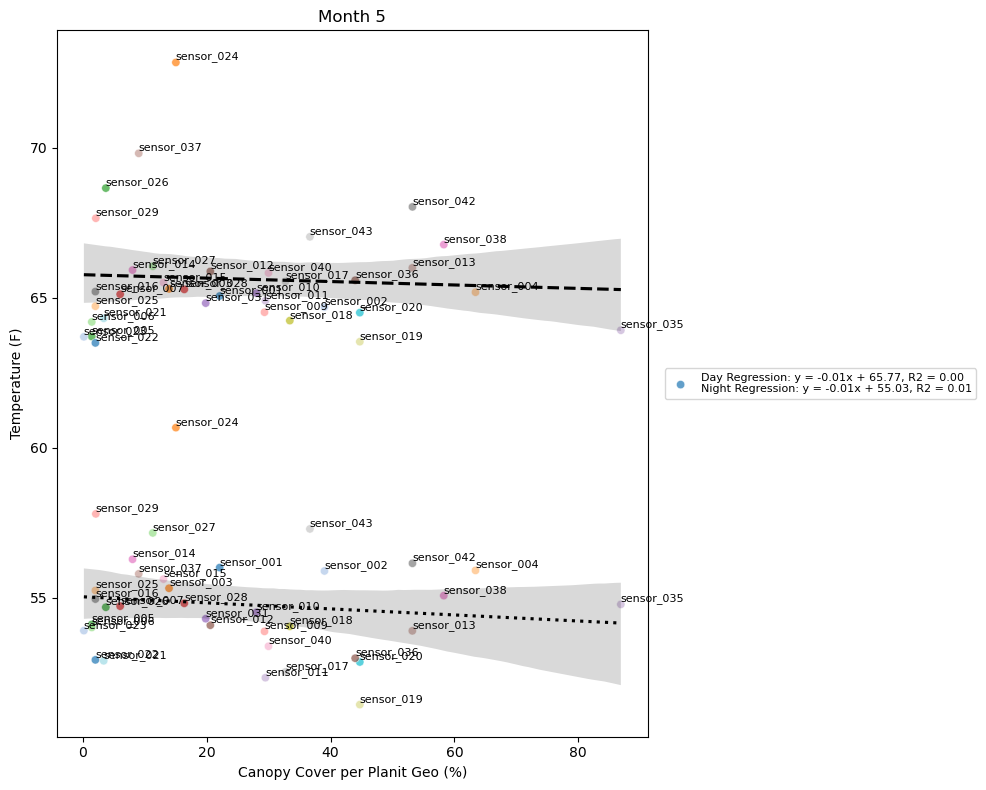

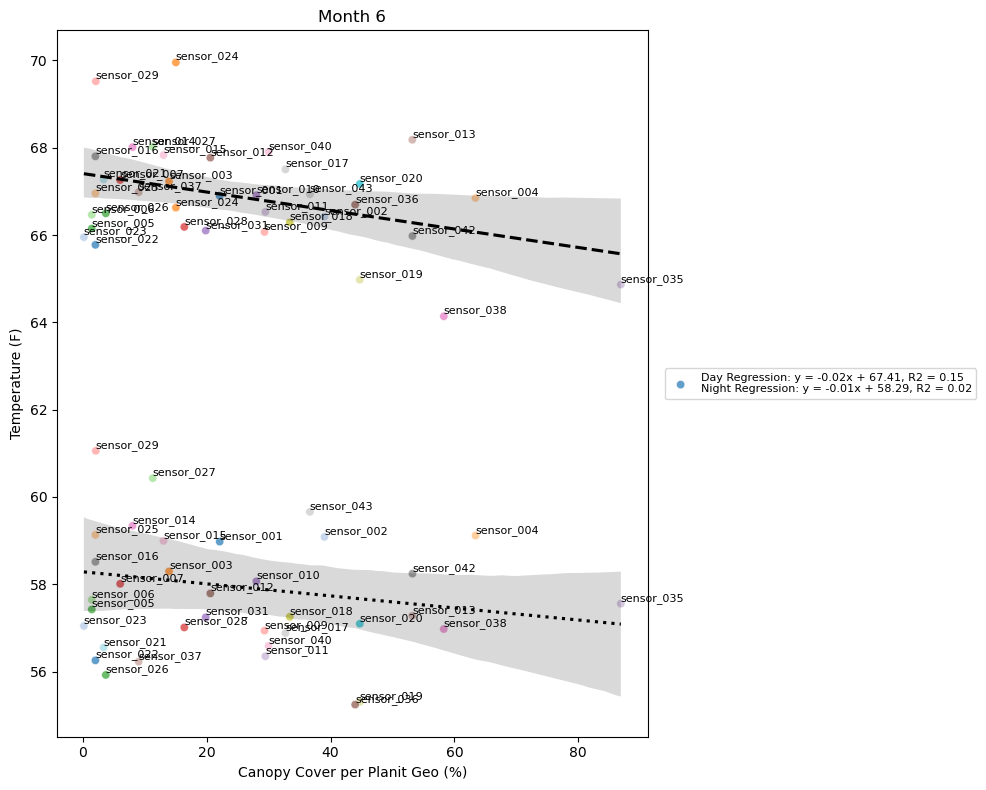

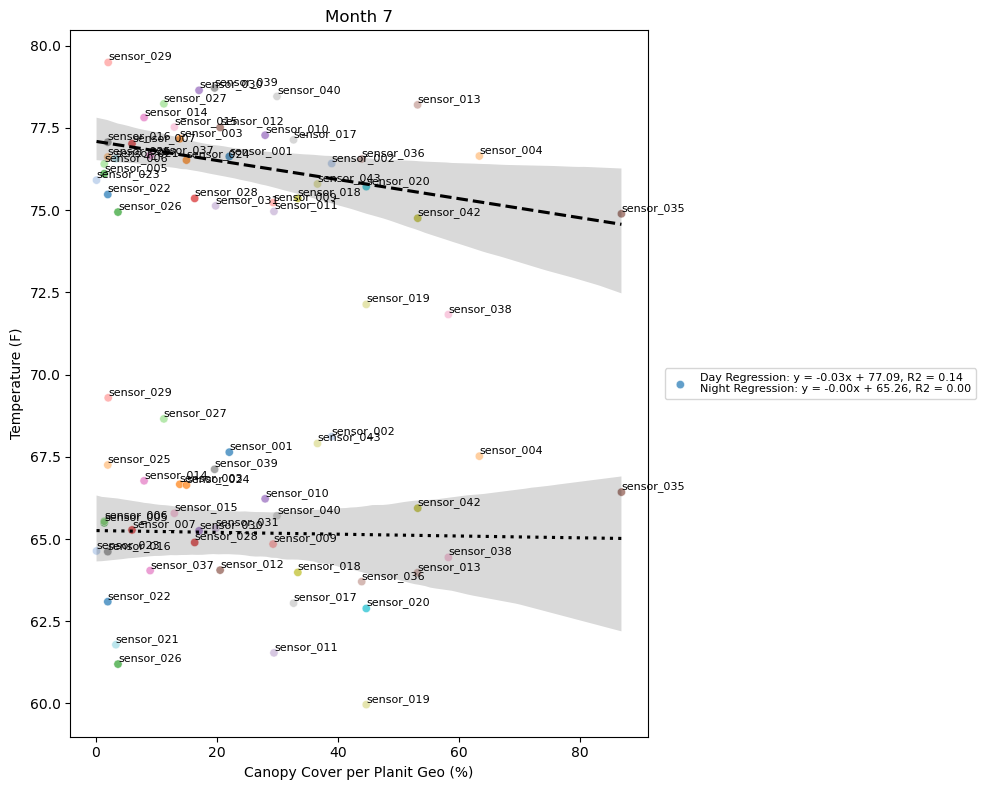

In [99]:
# Save each plot for each month with the legend (using plaitgeodata
for month in range(5, 8):  # Replace with your desired months
    # Get the data for the current month
    month_data = monthly_temps_new_data[monthly_temps_new_data['month'] == month]

    # Create the plot as before, but replace 'cc_per_30' with 'cc_per_planitgeo' and 'Canopy Cover' with 'Impervious Cover'
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.scatterplot(data=month_data, x='cc_per_planitgeo', y='temp_fahrenheit', hue='sensor_number',
                    ax=ax, palette='tab20', alpha=0.7, markers='o')
    sns.regplot(data=month_data[month_data['Time of Day'] == 'Day'], x='cc_per_planitgeo', y='temp_fahrenheit', 
                color='black', scatter=False, ax=ax, line_kws={'linestyle':'dashed'})
    sns.regplot(data=month_data[month_data['Time of Day'] == 'Night'], x='cc_per_planitgeo', y='temp_fahrenheit', 
                color='black', scatter=False, ax=ax, line_kws={'linestyle':'dotted'})
    
    # Label the sensor_number on the plot
    for _, day_row, night_row in zip(month_data.index, 
                                     month_data[month_data['Time of Day'] == 'Day'].iterrows(), 
                                     month_data[month_data['Time of Day'] == 'Night'].iterrows()):
        ax.text(day_row[1]['cc_per_planitgeo'], day_row[1]['temp_fahrenheit'], str(day_row[1]['sensor_number']), 
                fontsize=8, ha='left', va='bottom')
        ax.text(night_row[1]['cc_per_planitgeo'], night_row[1]['temp_fahrenheit'], str(night_row[1]['sensor_number']), 
                fontsize=8, ha='left', va='bottom')

    # Calculate regression coefficients and R-squared values for day and night data
    day_coefficients = np.polyfit(month_data[month_data['Time of Day'] == 'Day']['cc_per_planitgeo'], 
                                  month_data[month_data['Time of Day'] == 'Day']['temp_fahrenheit'], 1)
    night_coefficients = np.polyfit(month_data[month_data['Time of Day'] == 'Night']['cc_per_planitgeo'], 
                                    month_data[month_data['Time of Day'] == 'Night']['temp_fahrenheit'], 1)
    day_r2 = np.corrcoef(month_data[month_data['Time of Day'] == 'Day']['cc_per_planitgeo'], 
                         month_data[month_data['Time of Day'] == 'Day']['temp_fahrenheit'])[0, 1] ** 2
    night_r2 = np.corrcoef(month_data[month_data['Time of Day'] == 'Night']['cc_per_planitgeo'], 
                           month_data[month_data['Time of Day'] == 'Night']['temp_fahrenheit'])[0, 1] ** 2

    # Create custom legend for regression equations and R-squared values
    legend_text = f"Day Regression: y = {day_coefficients[0]:.2f}x + {day_coefficients[1]:.2f}, R2 = {day_r2:.2f}\n" \
                  f"Night Regression: y = {night_coefficients[0]:.2f}x + {night_coefficients[1]:.2f}, R2 = {night_r2:.2f}"
    ax.legend([legend_text], loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=8)

    # Set the title and labels for each subplot
    ax.set_title(f"Month {month}")
    ax.set_xlabel('Canopy Cover per Planit Geo (%)')
    ax.set_ylabel('Temperature (F)')

    # Save the plot with the legend
    plt.tight_layout()
    #plt.savefig(f'monthly_mean_max_ic_plot_month_{month}.pdf')
    plt.show()
    # For saving plot
    #plt.close()


/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


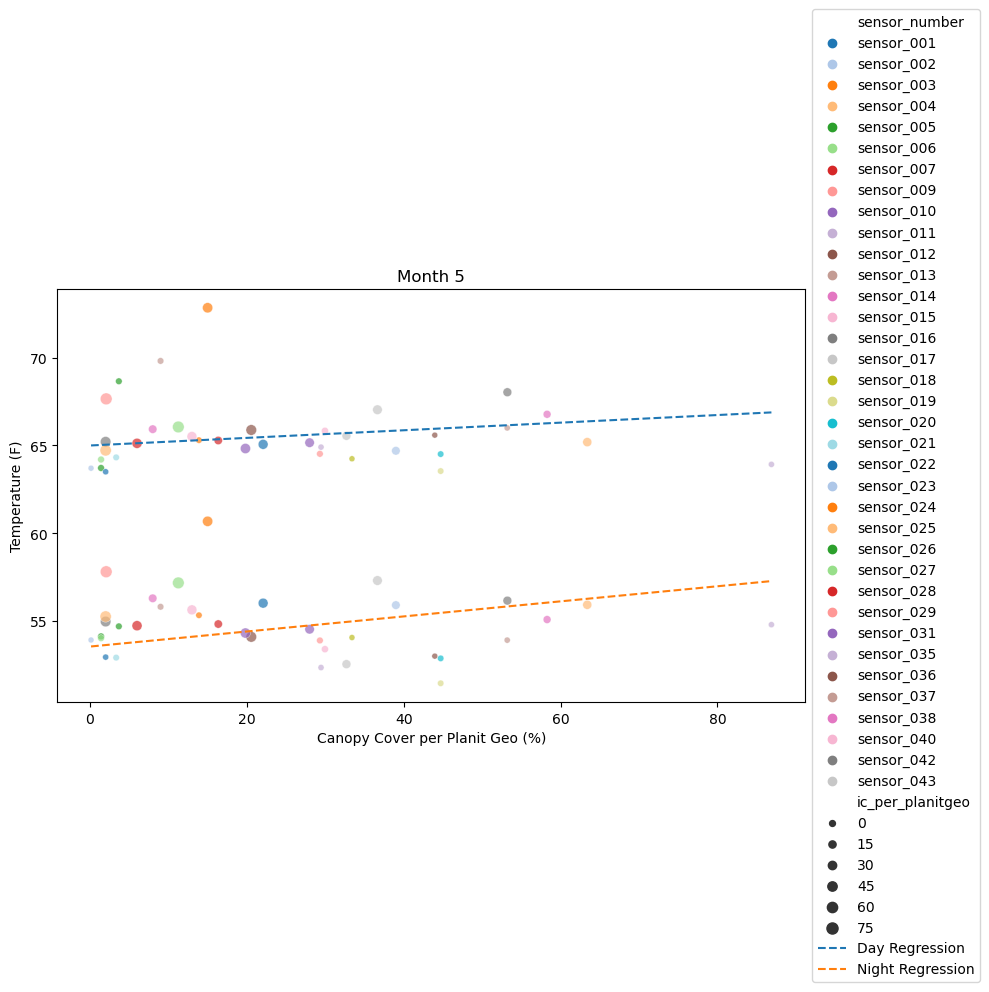

/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


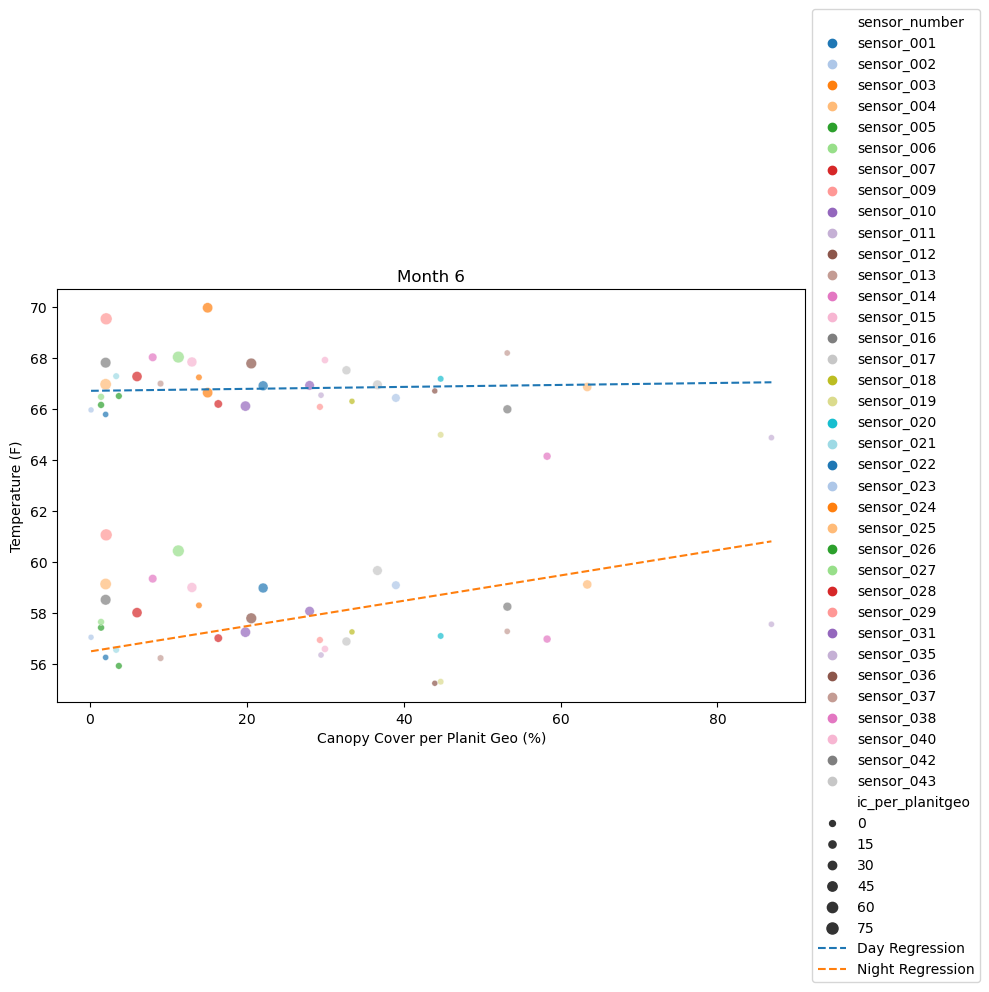

/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


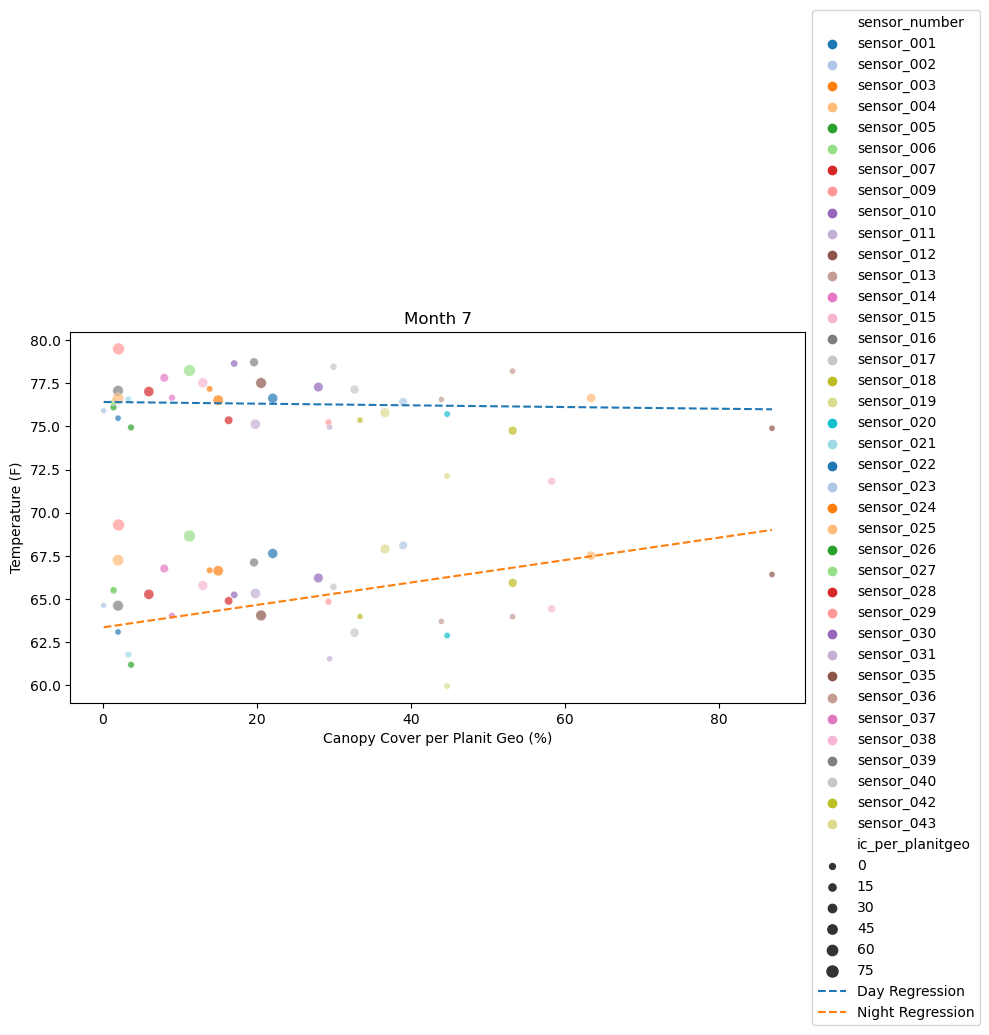

In [98]:
# Planitgeo linear regression model 
# Save each plot for each month with the legend and linear regression line
for month in range(5, 8):  # Replace with your desired months
    # Get the data for the current month
    month_data = monthly_temps_new_data[monthly_temps_new_data['month'] == month]

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Scatterplot of canopy cover vs. temperature, size based on impervious cover
    sns.scatterplot(data=month_data, x='cc_per_planitgeo', y='temp_fahrenheit', hue='sensor_number',
                    ax=ax, palette='tab20', alpha=0.7, markers='o', size='ic_per_planitgeo')
    
    # Perform linear regression for day and night data
    for time_of_day in ['Day', 'Night']:
        time_data = month_data[month_data['Time of Day'] == time_of_day]
        X = time_data[['cc_per_planitgeo', 'ic_per_planitgeo']]
        y = time_data['temp_fahrenheit']
        
        # Fit linear regression model
        model = LinearRegression()
        model.fit(X, y)
        
        # Plot regression line
        x_range = np.linspace(X['cc_per_planitgeo'].min(), X['cc_per_planitgeo'].max(), 100)
        y_pred = model.predict(np.vstack([x_range, x_range]).T)
        ax.plot(x_range, y_pred, label=f'{time_of_day} Regression', linestyle='dashed')
    
    # Move the legend to the side
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    ax.set_title(f"Month {month}")
    ax.set_xlabel('Canopy Cover per Planit Geo (%)')
    ax.set_ylabel('Temperature (F)')
    
    plt.tight_layout()
    #plt.savefig(f'monthly_regression_plot_month_{month}.pdf')
    #plt.close()
    plt.show()


/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


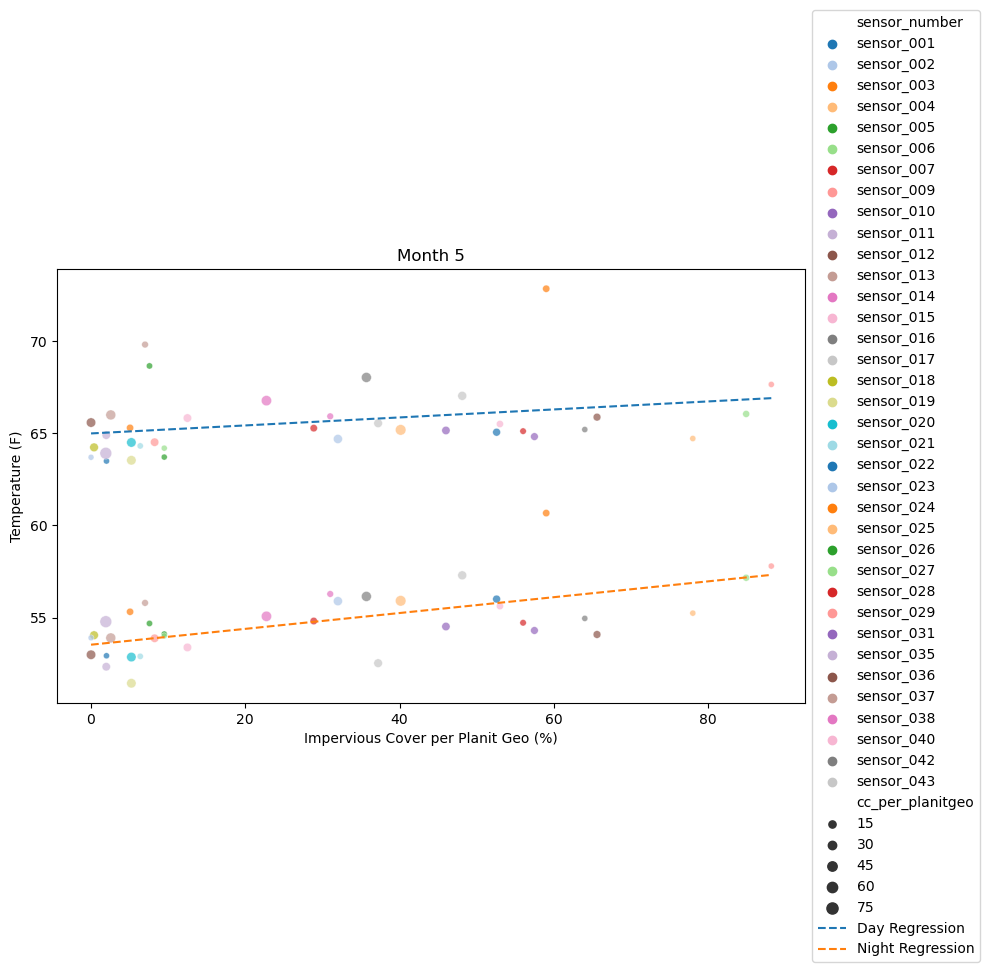

/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


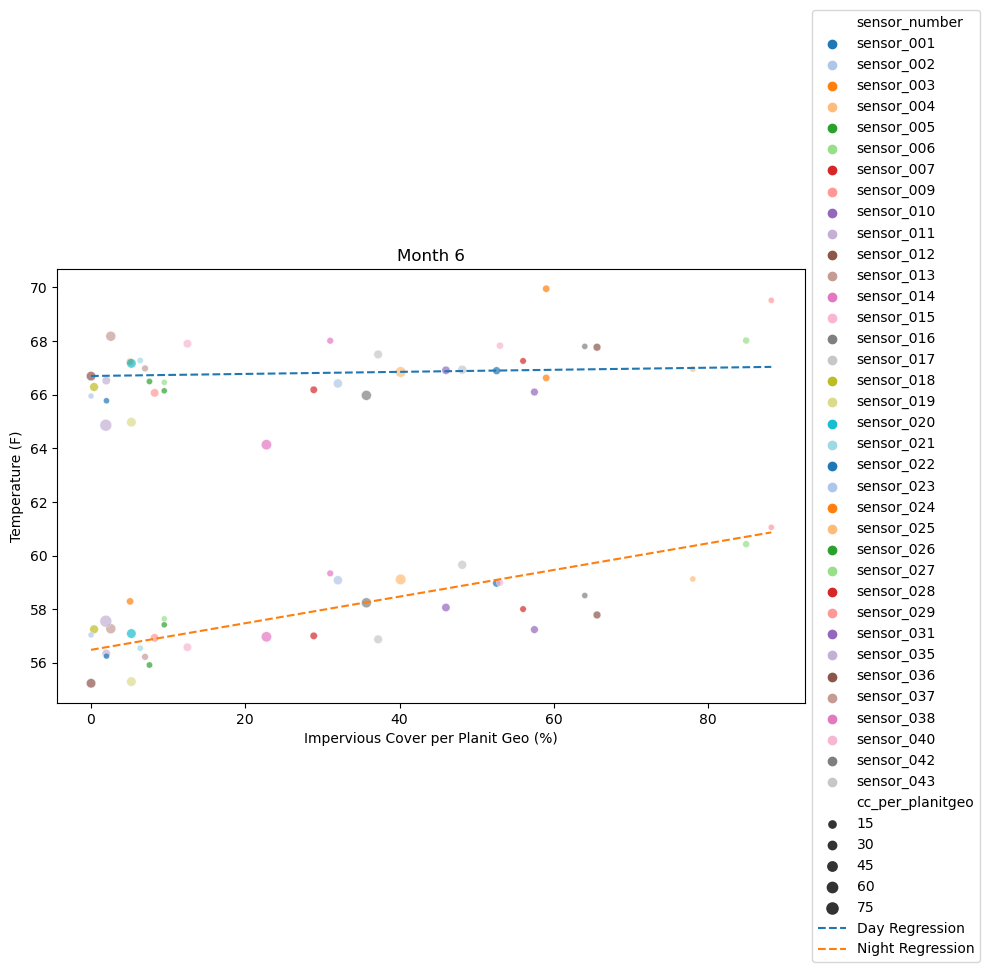

/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


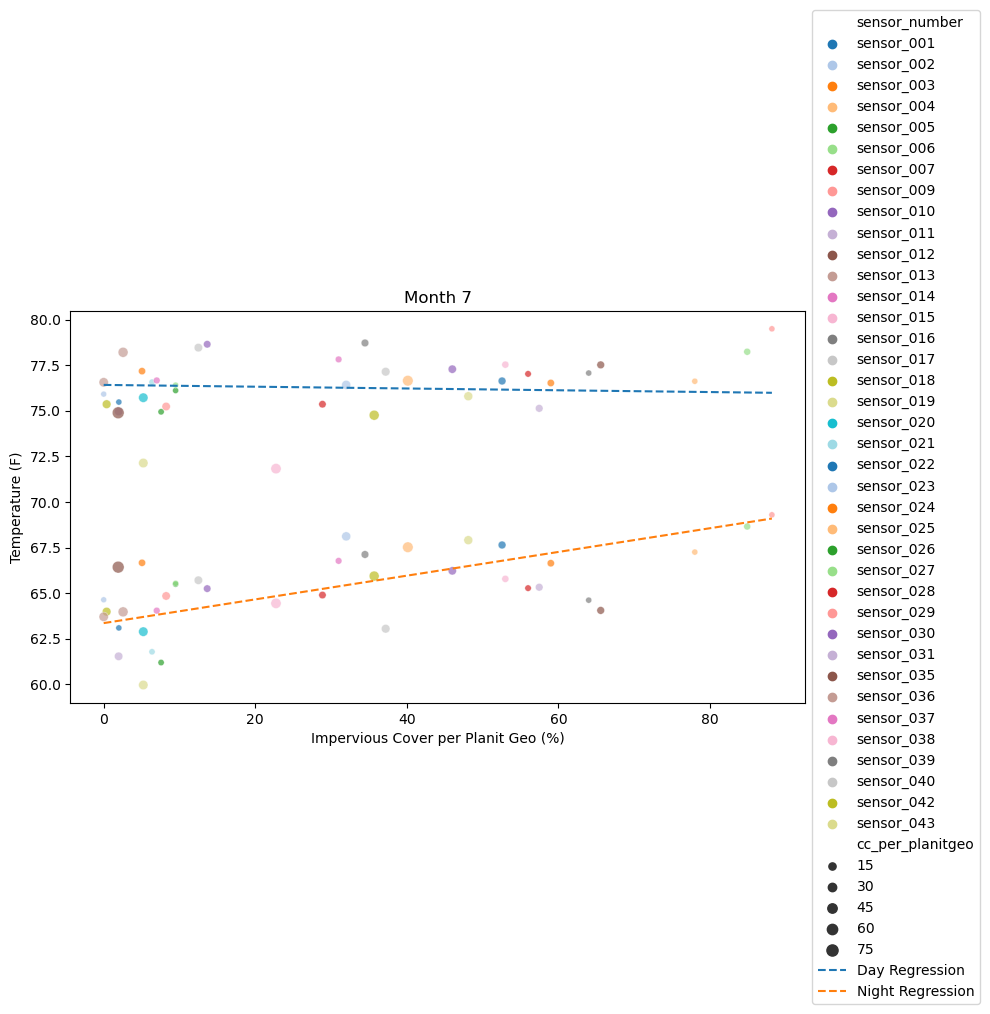

In [97]:
# Save each plot for each month with the legend and linear regression line
for month in range(5, 8):  # Replace with your desired months
    # Get the data for the current month
    month_data = monthly_temps_new_data[monthly_temps_new_data['month'] == month]

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Scatterplot of canopy cover vs. temperature, size based on impervious cover
    sns.scatterplot(data=month_data, x='ic_per_planitgeo', y='temp_fahrenheit', hue='sensor_number',
                    ax=ax, palette='tab20', alpha=0.7, markers='o', size='cc_per_planitgeo')
    
    # Perform linear regression for day and night data
    for time_of_day in ['Day', 'Night']:
        time_data = month_data[month_data['Time of Day'] == time_of_day]
        X = time_data[['ic_per_planitgeo', 'cc_per_planitgeo']]
        y = time_data['temp_fahrenheit']
        
        # Fit linear regression model
        model = LinearRegression()
        model.fit(X, y)
        
        # Plot regression line
        x_range = np.linspace(X['ic_per_planitgeo'].min(), X['ic_per_planitgeo'].max(), 100)
        y_pred = model.predict(np.vstack([x_range, x_range]).T)
        ax.plot(x_range, y_pred, label=f'{time_of_day} Regression', linestyle='dashed')
    
    # Move the legend to the side
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    ax.set_title(f"Month {month}")
    ax.set_xlabel('Impervious Cover per Planit Geo (%)')
    ax.set_ylabel('Temperature (F)')
    
    plt.tight_layout()
    #plt.savefig(f'monthly_regression_plot_month_{month}.pdf')
    #plt.close()
    plt.show()



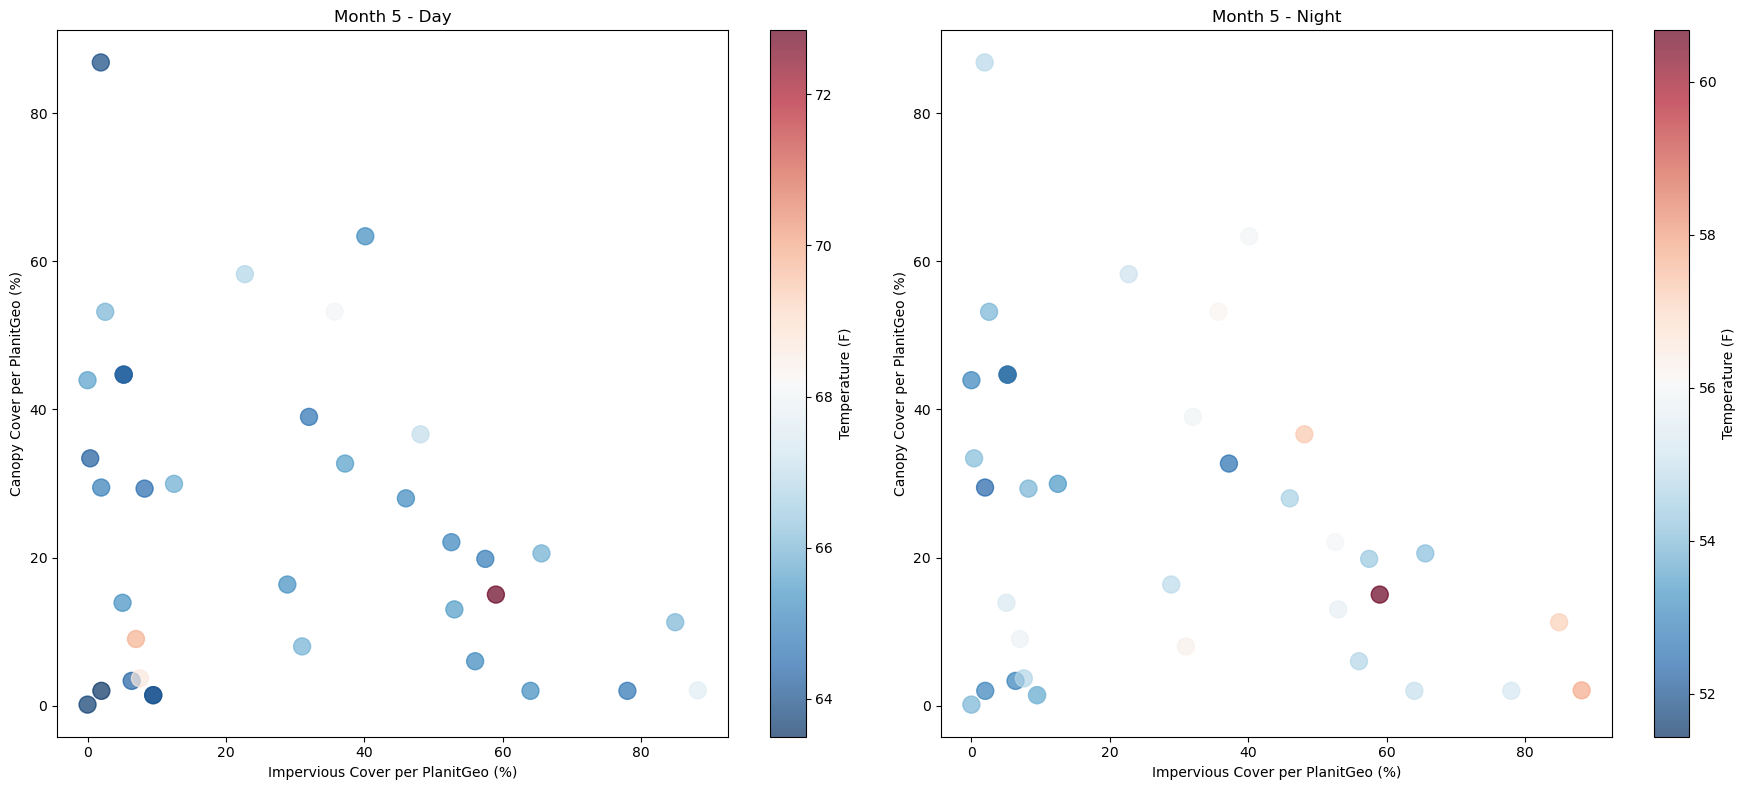

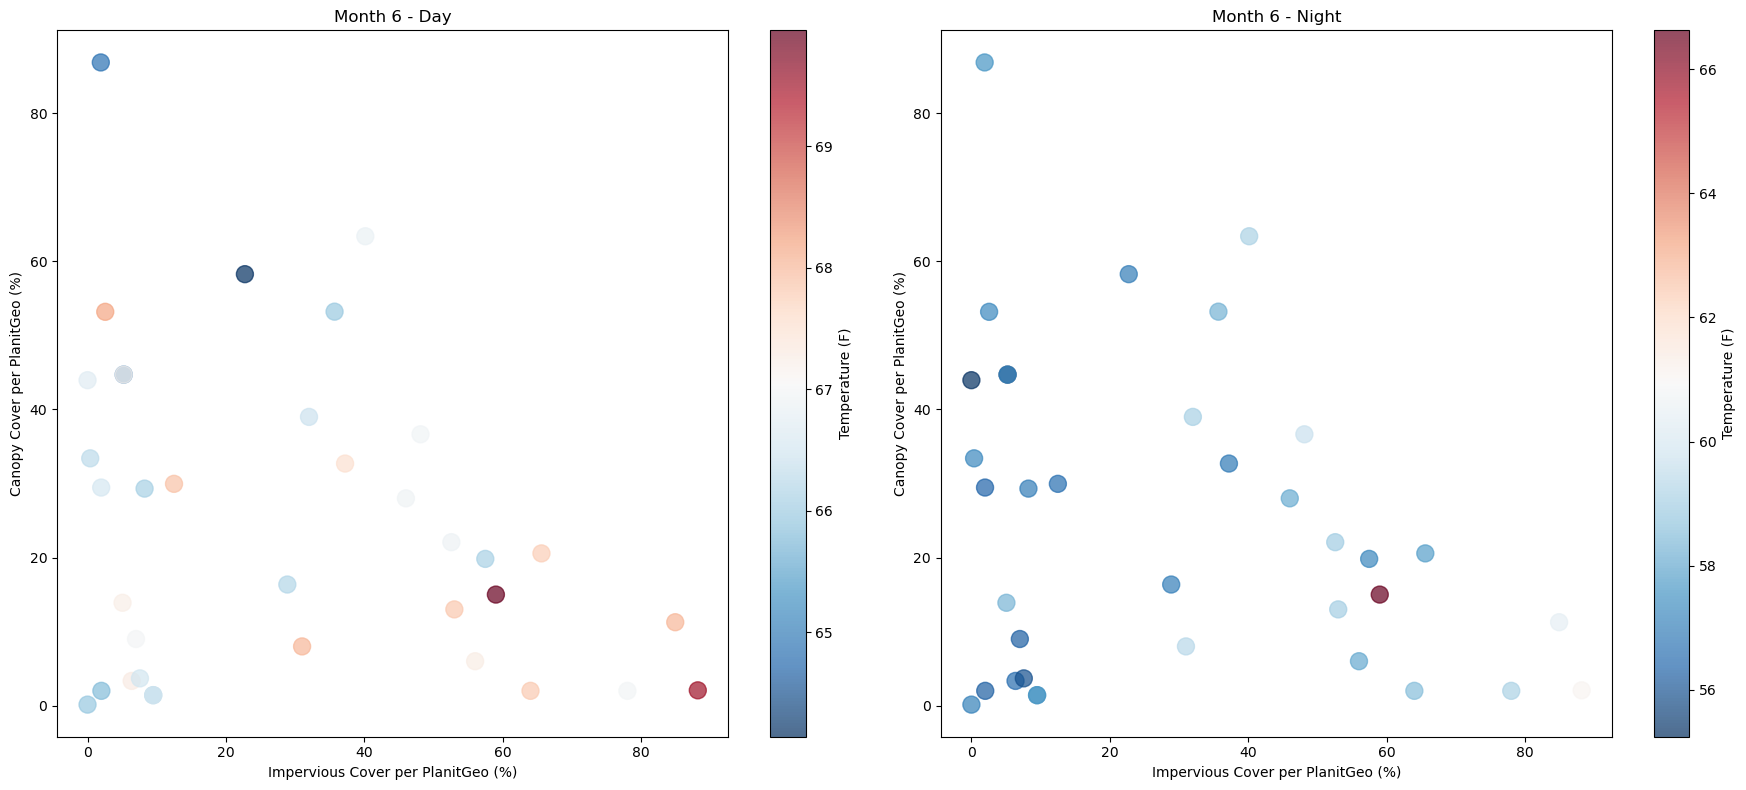

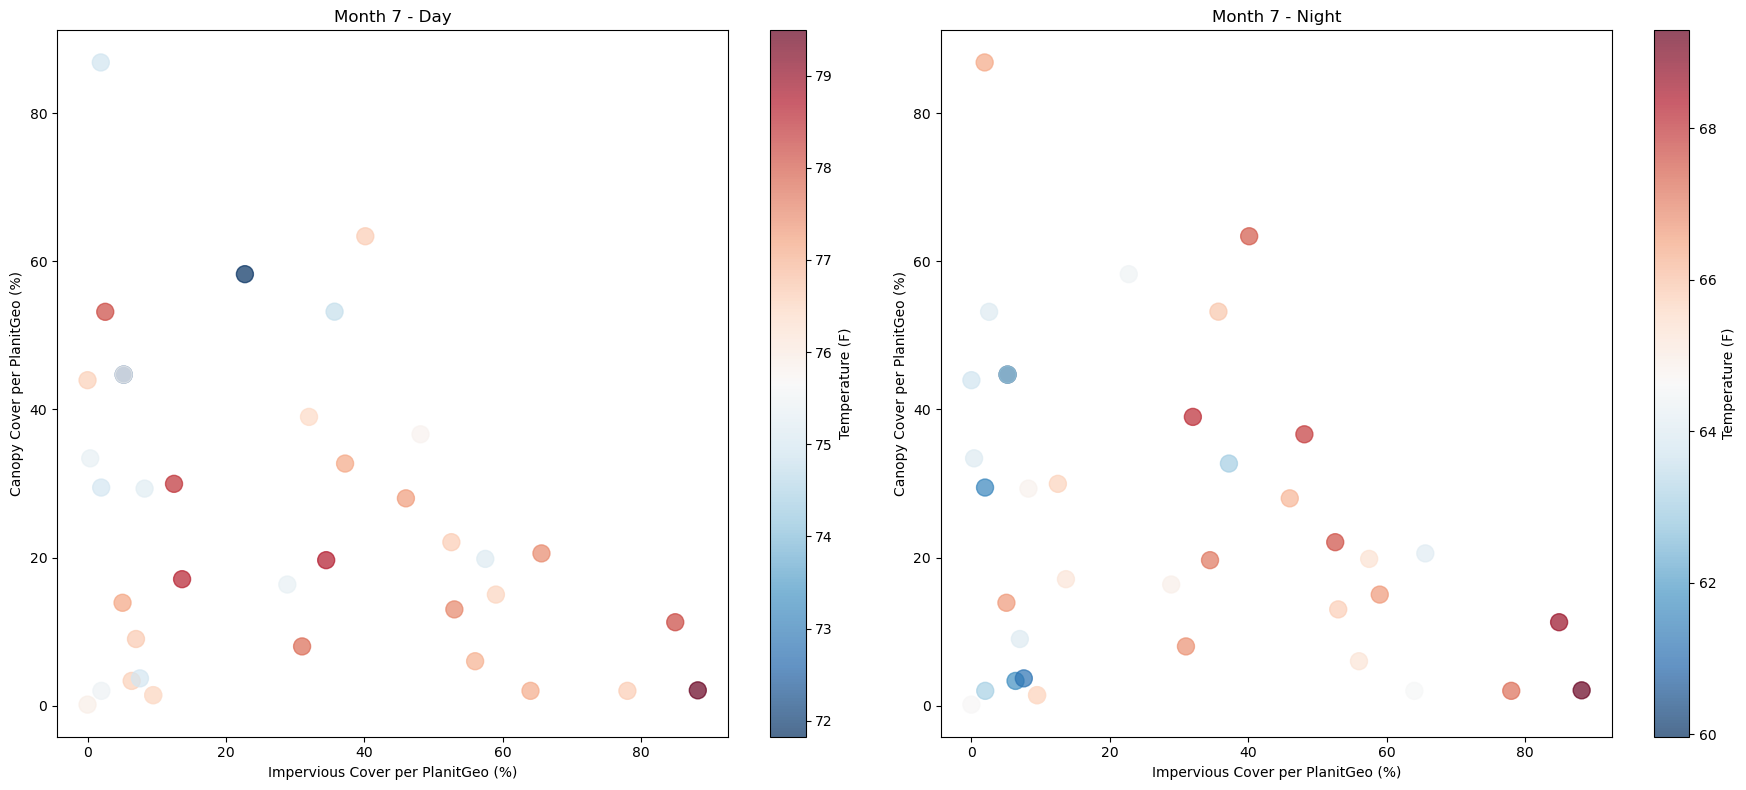

In [102]:
# Planitgeo x and y (cc and ic)
# Define a custom colormap with red and blue colors
custom_colormap = plt.cm.get_cmap('RdBu_r')

months = monthly_temps_new_data['month'].unique()

for month in months:
    month_data = monthly_temps_new_data[monthly_temps_new_data['month'] == month]

    fig, (ax_day, ax_night) = plt.subplots(1, 2, figsize=(18, 8))

    scatter_day = ax_day.scatter(month_data[month_data['Time of Day'] == 'Day']['ic_per_planitgeo'],
                                  month_data[month_data['Time of Day'] == 'Day']['cc_per_planitgeo'],
                                  c=month_data[month_data['Time of Day'] == 'Day']['temp_fahrenheit'],
                                  cmap=custom_colormap, alpha=0.7, s=150)

    scatter_night = ax_night.scatter(month_data[month_data['Time of Day'] == 'Night']['ic_per_planitgeo'],
                                      month_data[month_data['Time of Day'] == 'Night']['cc_per_planitgeo'],
                                      c=month_data[month_data['Time of Day'] == 'Night']['temp_fahrenheit'],
                                      cmap=custom_colormap, alpha=0.7, s=150)

    cbar_day = plt.colorbar(scatter_day, ax=ax_day)
    cbar_day.set_label('Temperature (F)')

    cbar_night = plt.colorbar(scatter_night, ax=ax_night)
    cbar_night.set_label('Temperature (F)')

    ax_day.set_title(f"Month {month} - Day")
    ax_night.set_title(f"Month {month} - Night")

    ax_day.set_xlabel('Impervious Cover per PlanitGeo (%)')
    ax_day.set_ylabel('Canopy Cover per PlanitGeo (%)')

    ax_night.set_xlabel('Impervious Cover per PlanitGeo (%)')
    ax_night.set_ylabel('Canopy Cover per PlanitGeo (%)')

    plt.tight_layout()
    #plt.savefig(f'monthly_cc_ic_temp_spectrum_month_{month}_custom_colors.pdf')
    plt.show()


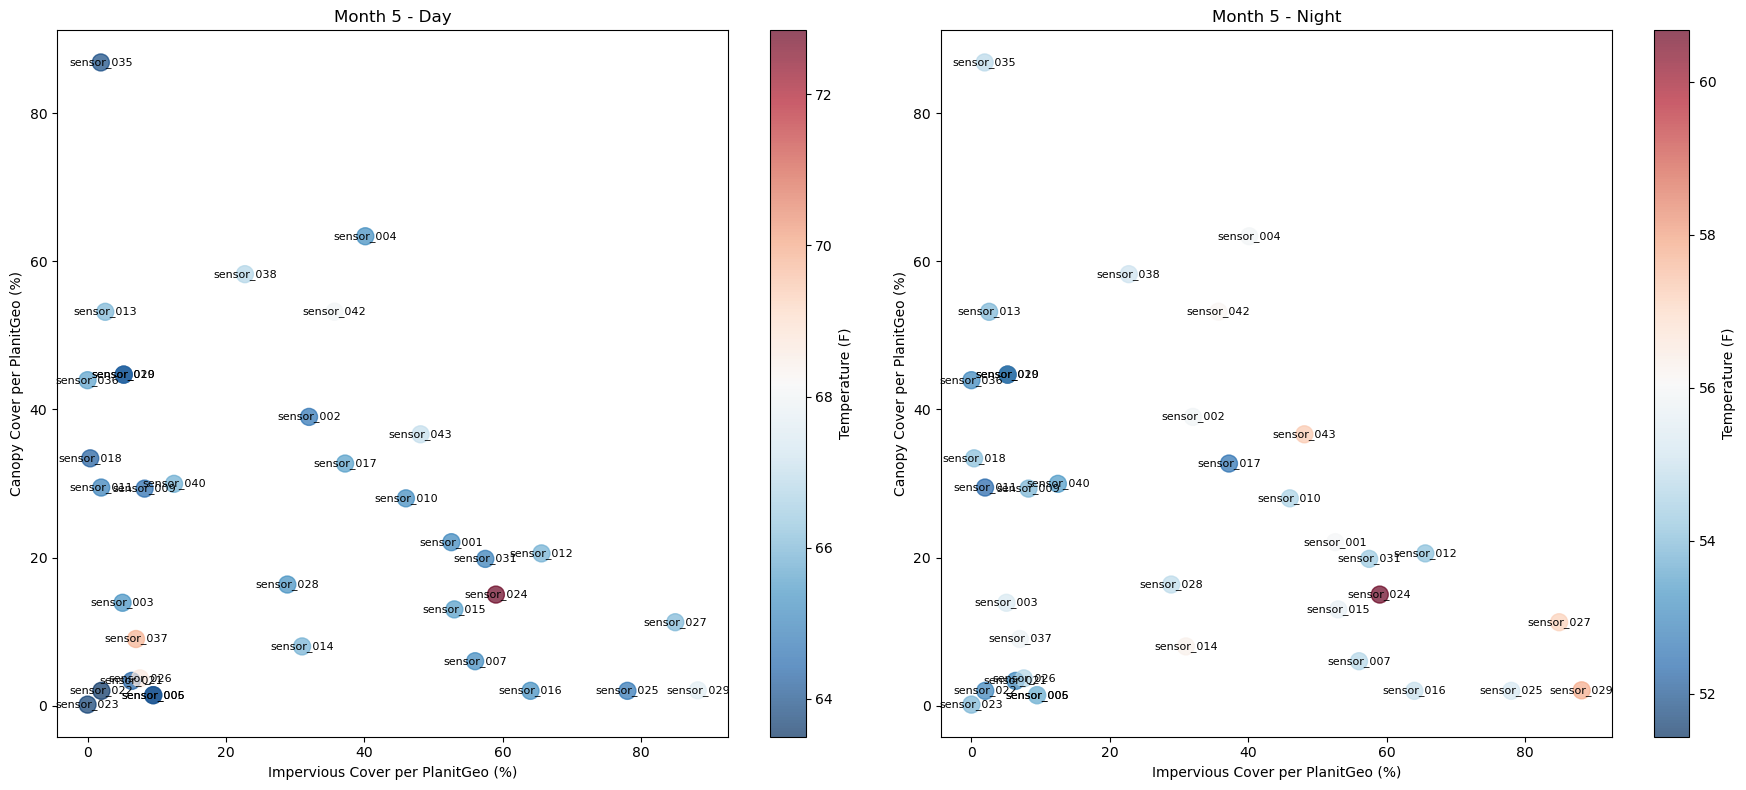

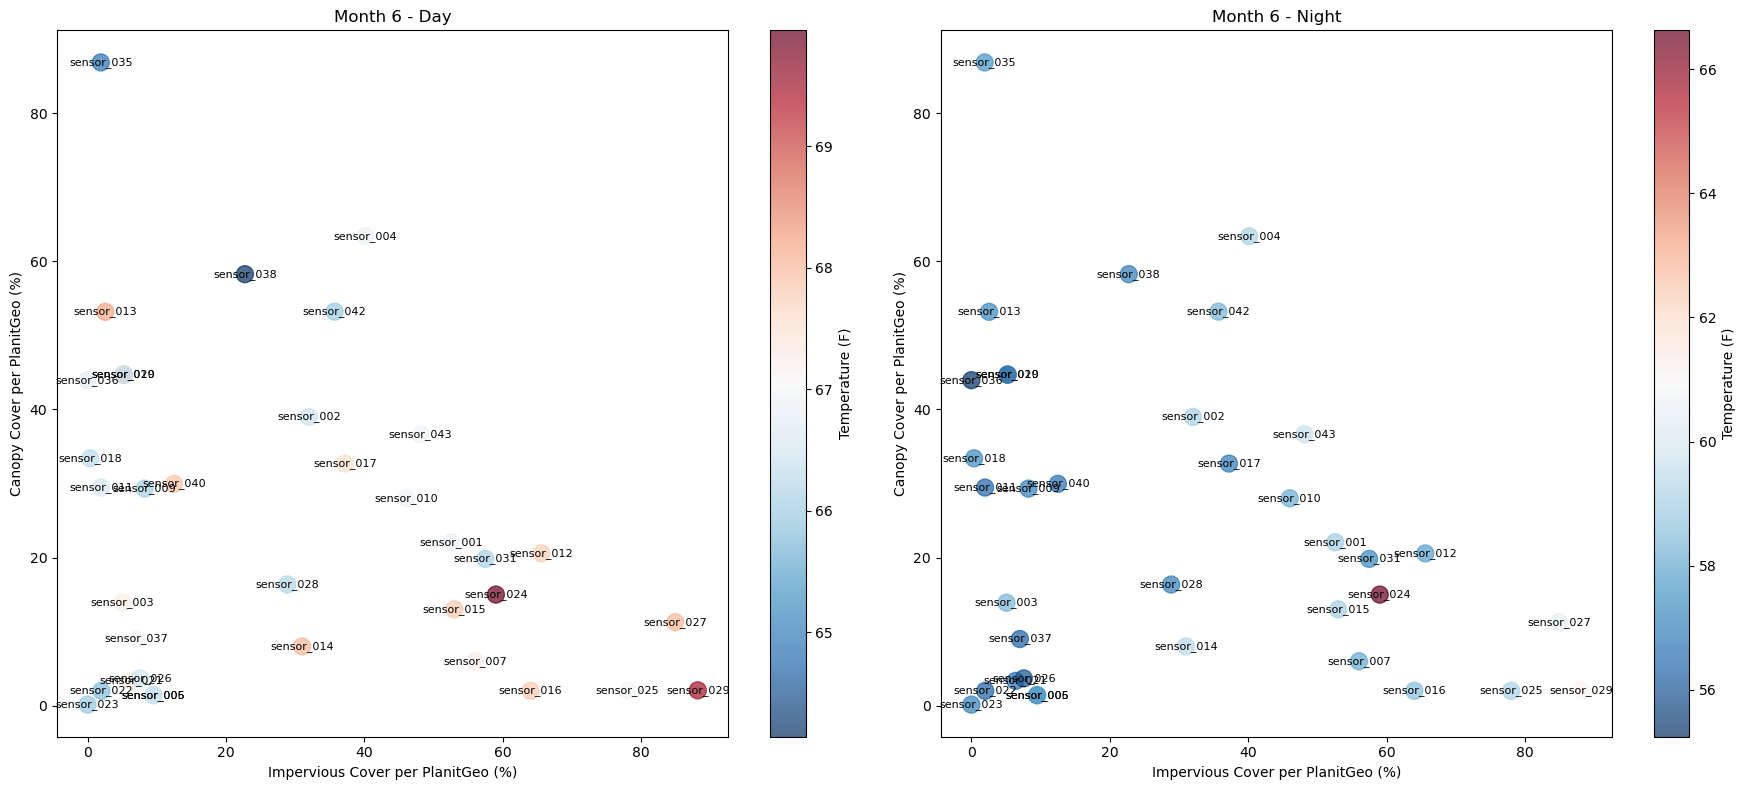

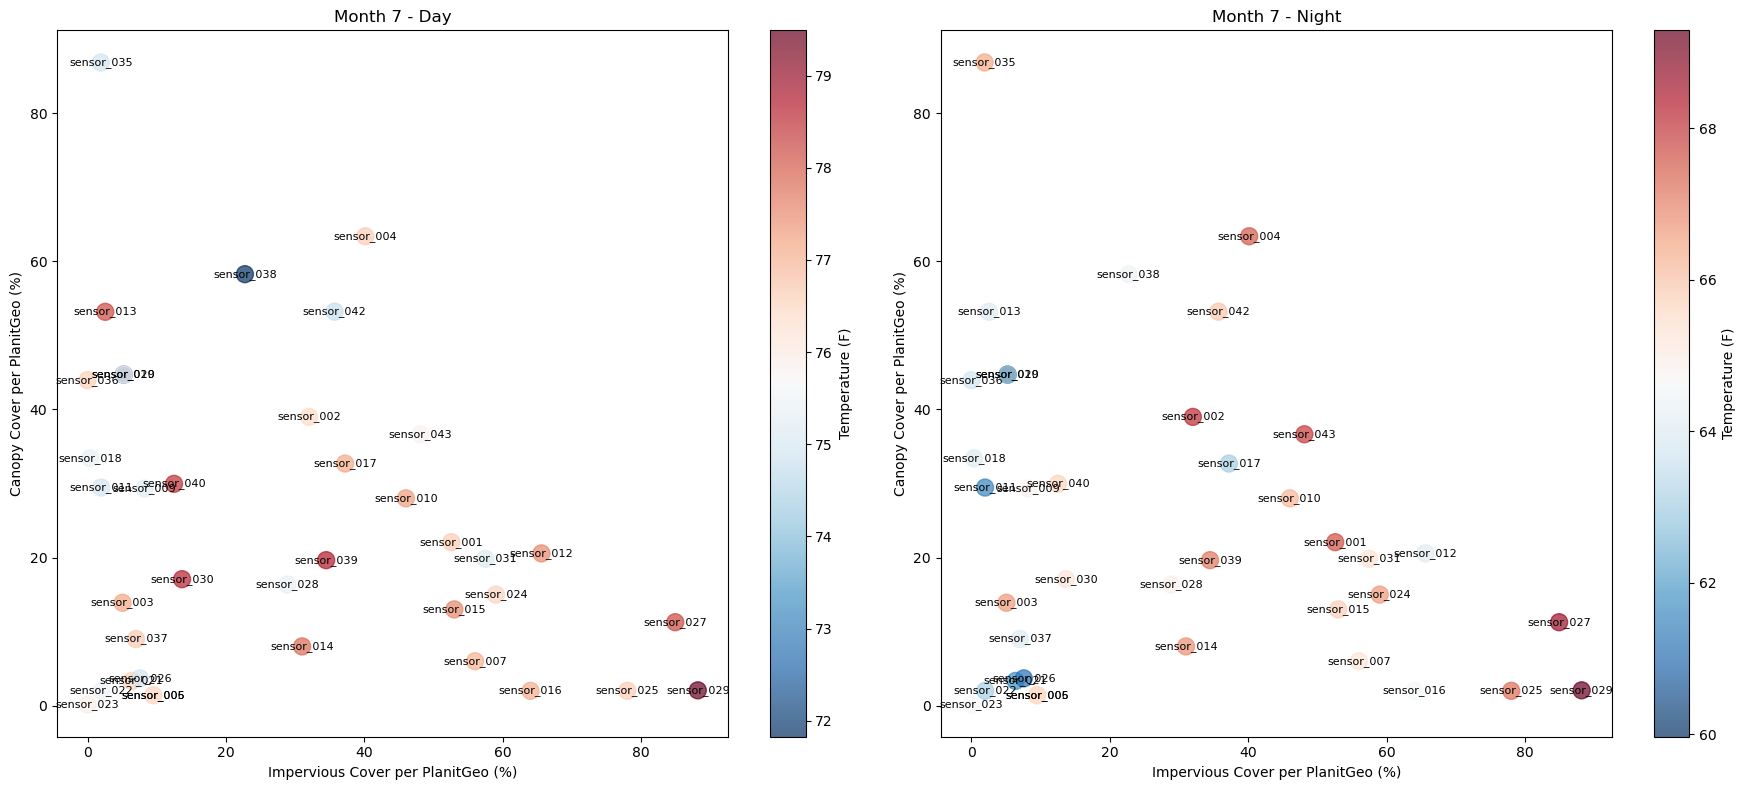

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your monthly_temps_new_data dataframe here
# monthly_temps_new_data = ...

# Define a custom colormap with red and blue colors
custom_colormap = plt.cm.get_cmap('RdBu_r')

months = monthly_temps_new_data['month'].unique()

for month in months:
    month_data = monthly_temps_new_data[monthly_temps_new_data['month'] == month]

    fig, (ax_day, ax_night) = plt.subplots(1, 2, figsize=(18, 8))

    scatter_day = ax_day.scatter(month_data[month_data['Time of Day'] == 'Day']['ic_per_planitgeo'],
                                  month_data[month_data['Time of Day'] == 'Day']['cc_per_planitgeo'],
                                  c=month_data[month_data['Time of Day'] == 'Day']['temp_fahrenheit'],
                                  cmap=custom_colormap, alpha=0.7, s=150)

    scatter_night = ax_night.scatter(month_data[month_data['Time of Day'] == 'Night']['ic_per_planitgeo'],
                                      month_data[month_data['Time of Day'] == 'Night']['cc_per_planitgeo'],
                                      c=month_data[month_data['Time of Day'] == 'Night']['temp_fahrenheit'],
                                      cmap=custom_colormap, alpha=0.7, s=150)

    cbar_day = plt.colorbar(scatter_day, ax=ax_day)
    cbar_day.set_label('Temperature (F)')

    cbar_night = plt.colorbar(scatter_night, ax=ax_night)
    cbar_night.set_label('Temperature (F)')

    for _, row in month_data.iterrows():
        if row['Time of Day'] == 'Day':
            ax_day.text(row['ic_per_planitgeo'], row['cc_per_planitgeo'], row['sensor_number'],
                        fontsize=8, ha='center', va='center')
        elif row['Time of Day'] == 'Night':
            ax_night.text(row['ic_per_planitgeo'], row['cc_per_planitgeo'], row['sensor_number'],
                          fontsize=8, ha='center', va='center')

    ax_day.set_title(f"Month {month} - Day")
    ax_night.set_title(f"Month {month} - Night")

    ax_day.set_xlabel('Impervious Cover per PlanitGeo (%)')
    ax_day.set_ylabel('Canopy Cover per PlanitGeo (%)')

    ax_night.set_xlabel('Impervious Cover per PlanitGeo (%)')
    ax_night.set_ylabel('Canopy Cover per PlanitGeo (%)')

    plt.tight_layout()
   # plt.savefig(f'monthly_cc_ic_temp_spectrum_month_{month}_custom_colors_with_labels.pdf')
   # plt.close()
    plt.show()


In [122]:
# Min temps 
# Convert the Series to a DataFrame
average_min_temp_per_month_per_sensor_df = average_min_temp_per_month_per_sensor.reset_index()

print("Average of Monthly Minimum Temperatures for Each Sensor:")
average_min_temp_per_month_per_sensor_df


Average of Monthly Minimum Temperatures for Each Sensor:


,month,sensor_number,min_temperature
0,2023-05,sensor_001,44.35
1,2023-06,sensor_001,39.64
2,2023-07,sensor_001,47.21


In [125]:
# Merge min temps with planetgeo data 
# Merge the two DataFrames based on the 'ID' and 'sensor_number' columns
monthly_temps_new_data = average_min_temp_per_month_per_sensor_df.merge(new_cover_data, left_on='sensor_number', right_on='ID', how='left')

# Drop the duplicate 'ID' column that came from the merge
monthly_min_temps = monthly_temps_new_data.drop(columns=['ID'])

# Print the merged DataFrame
monthly_min_temps


,month,sensor_number,min_temperature,cc_per_planitgeo,ic_per_planitgeo
0,2023-05,sensor_001,44.35,22.0772,52.5668
1,2023-06,sensor_001,39.64,22.0772,52.5668
2,2023-07,sensor_001,47.21,22.0772,52.5668
